# Trader Behavior & Market Sentiment Analysis
**Role**: Junior Data Scientist – Trader Behavior Insights  
**Candidate**: Salkineni Swetha  
**Tools Used**: Python, Pandas, Seaborn, Matplotlib, XGBoost, Scikit-learn  
**Objective**: To uncover insights between trading performance and crypto market sentiment, and build predictive models that can guide smarter trading decisions.


# Trader Behavior Insights Based on Bitcoin Market Sentiment

---

### Problem Statement
The objective of this analysis is to understand how trader behavior and performance on a Web3 trading platform is influenced by Bitcoin market sentiment — specifically the Fear and Greed Index. By linking historical trade data with market sentiment, we aim to uncover patterns in trading strategy, risk behavior, and profitability.

---

### Aim
- To analyze the relationship between **market sentiment** (Fear vs Greed) and **trader performance**
- To identify how sentiment impacts **trade size**, **risk behavior (leverage/start position)**, and **PnL outcomes**
- To build a basic **classification model** that predicts the trader’s PnL category based on key trade features

---

### 📂 Dataset Description

1. **Bitcoin Market Sentiment Dataset**
   - Contains daily sentiment scores (e.g., Fear, Greed, Neutral)
   - Columns: `date`, `classification` (sentiment type)

2. **Hyperliquid Historical Trader Data**
   - Records of actual trades on a Web3 platform
   - Columns include:
     - `account`, `symbol`, `execution price`, `side`, `size`, `Size USD`, `Start Position`, `Closed PnL`, `leverage`, `Timestamp IST`, and others

---

###  Expected Outcome
- Quantitative insights into how traders respond to market sentiment
- Visual analysis of trade size and risk behavior under different sentiment conditions
- A simple yet informative machine learning model to predict **PnL category** using selected features
- Actionable insights for designing better trading strategies or understanding behavioral finance in crypto markets

---


## Step 1 - Load Historical Trader Data

We begin by importing the required libraries and loading the historical trading data.  
This dataset contains detailed trade-level records from the Hyperliquid Web3 trading platform, including information like execution price, size, start position, PnL, etc.

We use `pandas` to load and explore the first few rows of the dataset to understand its structure.


In [1]:
import pandas as pd
import numpy as np

# Load your historical trader data
df = pd.read_csv("/content/historical_data.csv")

# View the first few rows
df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## Step 2 – Initial Data Overview

We use `.info()` to examine the basic structure of the historical dataset.  
This gives us insights into:
- The number of rows and columns
- Data types of each column
- Non-null (missing) values

It helps us quickly identify which columns might need cleaning or transformation.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

## Step 3 – Statistical Summary of Trader Data

We use `.describe()` to generate summary statistics for the numerical columns in the dataset.  
This includes key metrics such as mean, standard deviation, min, max, and percentiles.  
It helps us understand the distribution and range of trade-related variables like size, execution price, fees, and PnL.


In [3]:
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


## Step 4 – Missing Value Check

We check for missing values in each column using `.isnull().sum()`.  
Identifying null values is important before proceeding with analysis or model building, as they can affect calculations, groupings, and training accuracy.


In [4]:
df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


## Step 5 – Handling Missing Values

After identifying missing data, we fill them using appropriate strategies:

- **Numeric columns** (e.g., `Start Position`, `Closed PnL`, `Fee`) are filled using the **median**, which is robust against outliers.
- **Categorical columns** (e.g., `Direction`, `Crossed`) are filled using the **mode**, i.e., the most frequent value.
- Unique identifiers like `Transaction Hash` are filled with a placeholder (e.g., `'missing_hash'`) for tracking purposes.

This step ensures the dataset is clean and ready for analysis or modeling.


In [5]:
# Fill numeric columns using median (robust to outliers)
df['Start Position'] = df['Start Position'].fillna(df['Start Position'].median())
df['Closed PnL'] = df['Closed PnL'].fillna(df['Closed PnL'].median())
df['Fee'] = df['Fee'].fillna(df['Fee'].median())
df['Trade ID'] = df['Trade ID'].fillna(df['Trade ID'].median())
df['Timestamp'] = df['Timestamp'].fillna(df['Timestamp'].median())
df['Order ID'] = df['Order ID'].fillna(df['Order ID'].median())

# Fill categorical columns using mode (most frequent value)
df['Direction'] = df['Direction'].fillna(df['Direction'].mode()[0])
df['Transaction Hash'] = df['Transaction Hash'].fillna('missing_hash')
df['Crossed'] = df['Crossed'].fillna(df['Crossed'].mode()[0])


##  Step 6 – Convert 'Crossed' Column to Boolean

After filling missing values in the `Crossed` column with its mode, we convert the entire column to boolean type (`True` or `False`).

This ensures consistency and prepares it for logical operations or modeling, as `Crossed` represents a binary condition (e.g., whether a trade crossed the spread).


In [6]:
df['Crossed'] = df['Crossed'].fillna(df['Crossed'].mode()[0]).astype(bool)
df['Crossed']

,Crossed
0,True
1,True
2,True
3,True
4,True
...,...
211219,False
211220,False
211221,False
211222,False


## Step 7 – Convert Timestamp to Date Format

We convert the `Timestamp IST` column into a proper `datetime` object using `pd.to_datetime()`.  
Then, we extract only the **date part** and store it in a new column called `date`.  
This prepares the dataset for merging with the sentiment data, which is


In [7]:
df['timestamp_ist'] = pd.to_datetime(df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
df['date'] = df['timestamp_ist'].dt.date
print("Invalid datetime values (NaT):", df['timestamp_ist'].isnull().sum())


Invalid datetime values (NaT): 0


## Step 8 – Handle Invalid Timestamps

For rows where timestamp conversion failed (resulting in `NaT`), we fill those values with a default fallback date (`2024-01-01`).  
This ensures there are no missing values in the `timestamp_ist` column.

After filling, we recalculate the `date` column to reflect the corrected datetime values.


In [8]:
# Fill invalid timestamp with a default/fallback date
df['timestamp_ist'] = df['timestamp_ist'].fillna(pd.to_datetime('2024-01-01'))
df['timestamp_ist']
# Recalculate 'date' column after filling
df['date'] = df['timestamp_ist'].dt.date
df['date']

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02
...,...
211219,2025-04-25
211220,2025-04-25
211221,2025-04-25
211222,2025-04-25


## Step 9 – Outlier Detection Using Boxplots

We visualize the distribution of key numerical features using boxplots.  
This helps us detect outliers and understand the spread and central tendency of variables like:

- `Execution Price`
- `Size USD`
- `Closed PnL`
- `Fee`
- `Start Position`

Boxplots are useful for spotting anomalies that may affect downstream analysis or modeling.


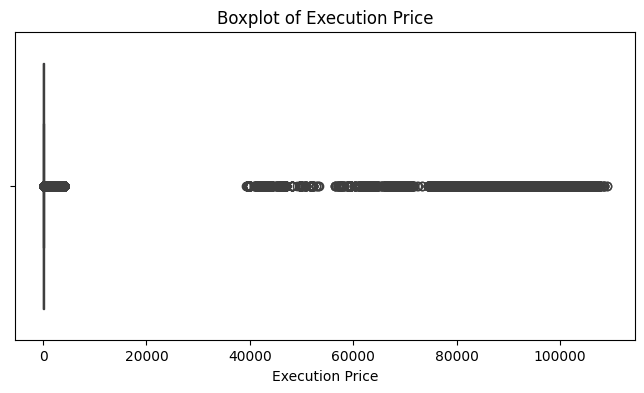

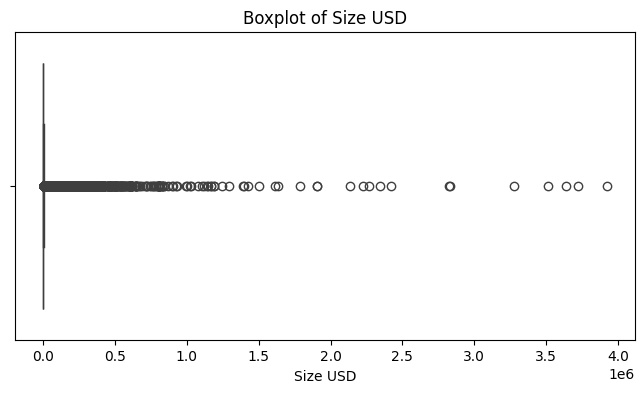

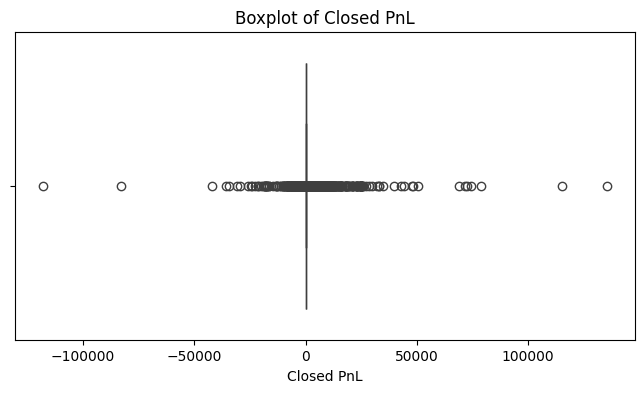

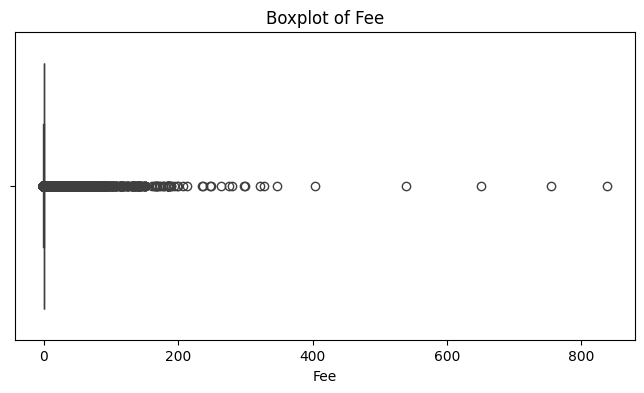

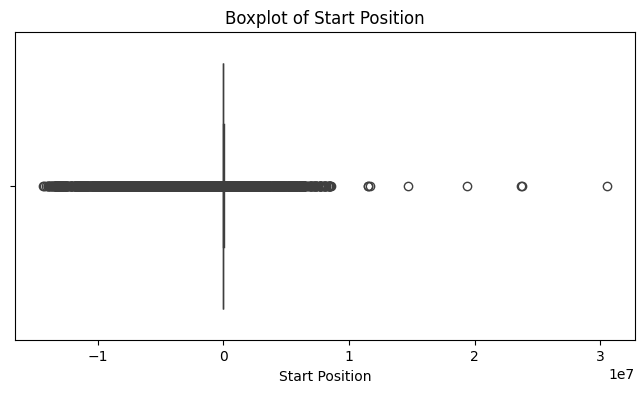

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: List numerical columns
num_cols = ['Execution Price', 'Size USD', 'Closed PnL', 'Fee', 'Start Position']

# Step 2: Plot boxplots for each one
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Step 10 – Winsorization to Handle Outliers

To reduce the impact of extreme outliers, we apply **winsorization** to selected numeric columns.  
Winsorization caps the values at specified lower and upper quantiles (1% and 99% here), ensuring that unusually large or small values don't distort the analysis.

Applied columns:
- `Execution Price`
- `Size USD`
- `Closed PnL`
- `Fee`
- `Start Position`


In [10]:
def winsorize_column(df, column, lower=0.01, upper=0.99):
    q_low = df[column].quantile(lower)
    q_high = df[column].quantile(upper)
    df[column] = df[column].clip(lower=q_low, upper=q_high)

# Apply to selected columns
columns_to_fix = ['Execution Price', 'Size USD', 'Closed PnL', 'Fee', 'Start Position']
for col in columns_to_fix:
    winsorize_column(df, col)


## Step 11 – Log Transformation of Skewed Features

To reduce skewness and normalize the distribution of highly variable features,  
we apply a **logarithmic transformation** using `np.log1p()` on:

- `Fee` → `log_fee`
- `Size USD` → `log_usd`

This transformation helps improve the performance of machine learning models and makes visualizations more interpretable.


In [11]:
import numpy as np

df['log_fee'] = np.log1p(df['Fee'])
df['log_usd'] = np.log1p(df['Size USD'])


##  Step 12 – Boxplots After Winsorization

We re-plot boxplots for the same numerical columns to verify the effect of winsorization.  
This allows us to visually confirm that extreme outliers have been capped and the distributions are now more stable.

Columns visualized:
- `Execution Price`
- `Size USD`
- `Closed PnL`
- `Fee`
- `Start Position`




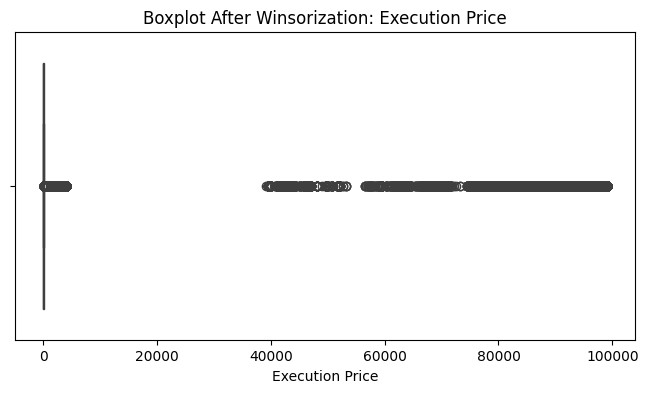

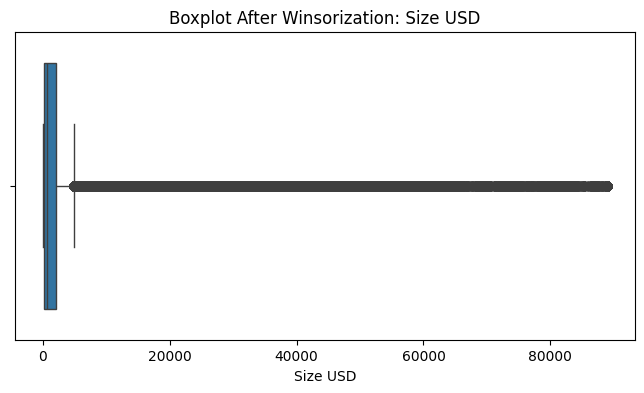

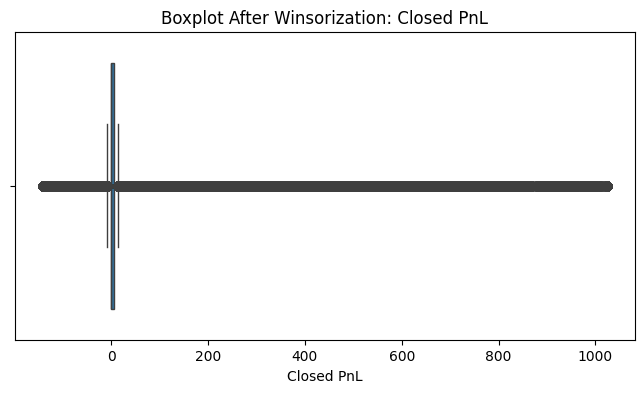

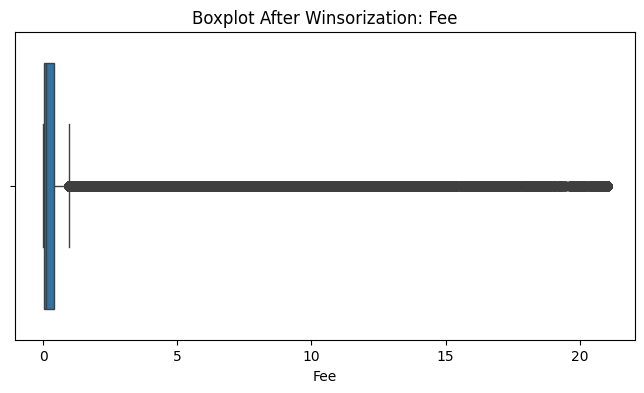

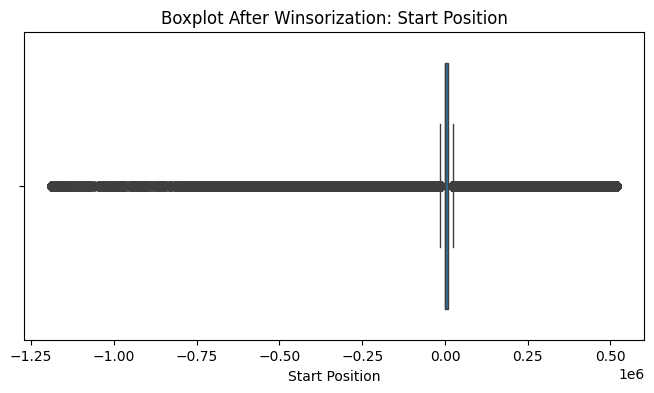

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns you winsorized
columns_to_check = ['Execution Price', 'Size USD', 'Closed PnL', 'Fee', 'Start Position']

# Re-plot boxplots
for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot After Winsorization: {col}')
    plt.show()


##  Step 13 – Trade Side Distribution (Buy vs Sell)

We use a countplot to visualize the distribution of trade sides — **BUY vs SELL**.

Each bar is annotated with its percentage share of total trades, providing a quick snapshot of whether the market is biased more toward buying or selling actions.

This helps understand overall trader sentiment and positioning.


/tmp/ipython-input-13-638754352.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Side', palette='Set2')


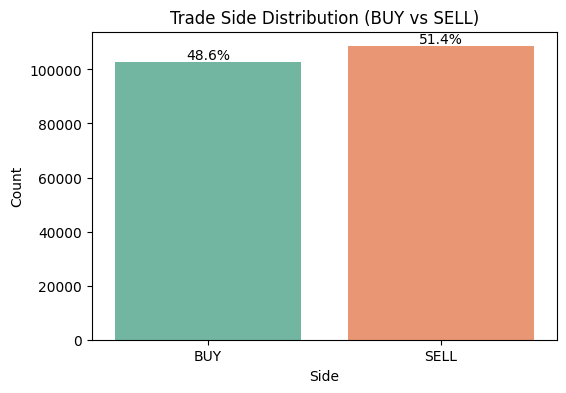

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot with percentage labels
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Side', palette='Set2')
plt.title('Trade Side Distribution (BUY vs SELL)')
plt.xlabel('Side')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


This is a very small difference (~3%). we don't need to balance this

##  Step 14 – Categorize Trades Based on Closed PnL

We create a new column called `PnL Category` to classify each trade based on its `Closed PnL` value:

- **Profit**: PnL > 0  
- **Loss**: PnL < 0  
- **Neutral**: PnL = 0

This categorical feature will help us analyze and predict trader outcomes more easily.
*

In [14]:
# Recreate the column if it’s missing
def categorize_pnl(pnl):
    if pnl > 0:
        return 'Profit'
    elif pnl < 0:
        return 'Loss'
    else:
        return 'Neutral'

df['PnL Category'] = df['Closed PnL'].apply(categorize_pnl)


##  Step 15 – Balance the PnL Classes for Modeling

The original dataset may have imbalanced classes (e.g., more Profit trades than Loss or Neutral).  
To prevent the model from being biased toward the majority class, we perform **downsampling**:

- We reduce the number of samples in the `Profit` and `Neutral` classes to match the count of `Loss` trades.
- We then combine and shuffle the data to create a balanced dataset for training.

This ensures fair training and better generalization in classification.


In [15]:
from sklearn.utils import resample

profit_df = df[df['PnL Category'] == 'Profit']
loss_df = df[df['PnL Category'] == 'Loss']
neutral_df = df[df['PnL Category'] == 'Neutral']

n_samples = len(loss_df)

profit_down = resample(profit_df, replace=False, n_samples=n_samples, random_state=42)
neutral_down = resample(neutral_df, replace=False, n_samples=n_samples, random_state=42)
df_balanced = pd.concat([profit_down, loss_df, neutral_down])
df_balanced = df_balanced.sample(frac=1, random_state=42)


## Step 16 – Verify Balanced Class Distribution

We print the value counts of the `PnL Category` column in the balanced dataset to confirm that  
each class (`Profit`, `Loss`, `Neutral`) now has an equal number of samples.

This step validates that the downsampling was successful.


In [16]:
print(df_balanced['PnL Category'].value_counts())


PnL Category
Loss       17539
Neutral    17539
Profit     17539
Name: count, dtype: int64


## Step 17 – Visualize Balanced Trade Outcome Distribution

We plot a countplot of the `PnL Category` from the balanced dataset to visually confirm that all three classes —  
**Profit**, **Loss**, and **Neutral** — now appear in equal proportions.

Percentage labels are added on top of each bar for clearer interpretation.


/tmp/ipython-input-17-3888894678.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_balanced, x='PnL Category', palette='pastel')


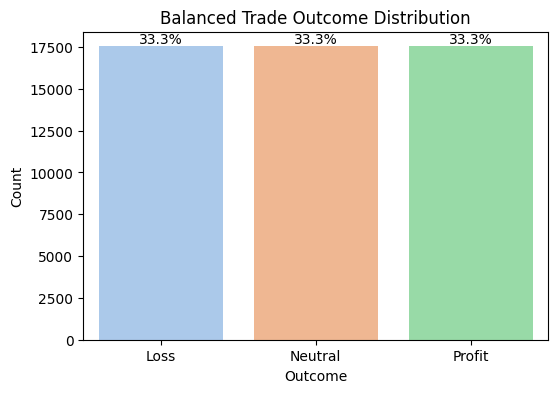

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the balanced dataset
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_balanced, x='PnL Category', palette='pastel')
plt.title('Balanced Trade Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Add percentage labels
total = len(df_balanced)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


What to Expect:


All three categories — Profit, Loss, and Neutral — with equal height bars.

Each will show ~33.3% if perfectly balanced.

##  Step 18 – Trend of Daily Trade Volume

We group the data by `date` and count the number of trades executed each day.  
This line chart visualizes how trading activity fluctuates over time, helping identify:

- Volume spikes or drops
- Periods of unusual market activity
- Trading behavior trends over time




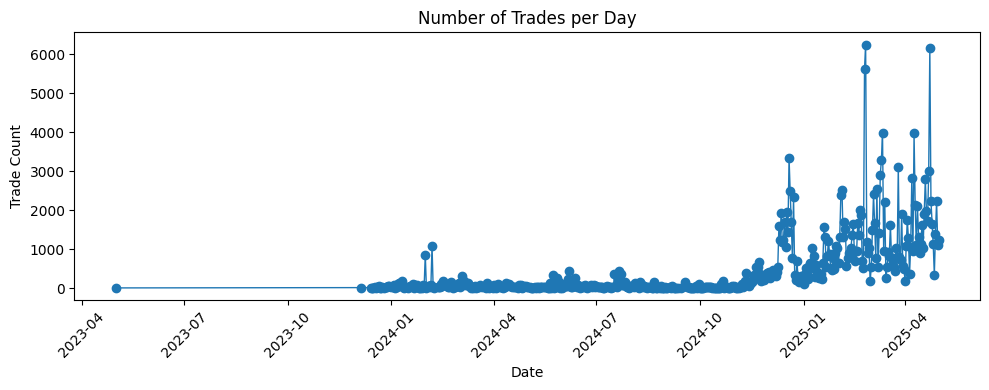

In [18]:
# Group by date and count number of trades
daily_trades = df.groupby('date').size()

# Plot
plt.figure(figsize=(10,4))
daily_trades.plot(kind='line', marker='o', linewidth=1)
plt.title('Number of Trades per Day')
plt.xlabel('Date')
plt.ylabel('Trade Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Summary of Completed Steps for Historical Trader Data

We’ve successfully completed the following data preparation and exploration steps:

-  Loaded and previewed historical trade data
-  Handled missing values using **median** for numeric and **mode** for categorical columns
-  Converted `Timestamp IST` to datetime and handled `NaT` entries
-  Created a `date` column to enable merging with sentiment data
-  Detected and visualized **outliers** using boxplots
-  Applied **winsorization** to reduce the impact of extreme outliers
-  Performed **log transformation** to normalize skewed features
-  Visualized **Side distribution** (BUY vs SELL) using percentage-based countplot
-  Created `PnL Category` (Profit, Loss, Neutral)
-  Balanced PnL classes using **downsampling**
-  Visualized the **balanced class distribution**
-  Plotted daily **trade volume trends**

---

##  Next Steps: Sentiment Integration & Analysis

Starting next, we will:

1. Load the **Fear/Greed Index** sentiment dataset  
2. Clean and convert the date column in sentiment data  
3. Merge it with the historical trade data using the `date` column  
4. Visualize **sentiment trends over time**  
5. Analyze how **market sentiment impacts trader behavior and PnL**  
6. *(Optional)* Build a predictive model based on sentiment and trade features  
7. Export insights and prepare documentation for submission

---

 Let's continue with loading the sentiment dataset!


##  Step 19 – Load Fear & Greed Sentiment Data

We now load the **Fear & Greed Index** dataset, which provides daily sentiment classifications such as:
- **Fear**
- **Greed**
- **Extreme Fear**
- **Extreme Greed**
- **Neutral**

This dataset will later be merged with the historical trader data based on the date to analyze behavioral patterns during various sentiment conditions.

We use `.head()` and `.info()` to inspect the structure and check for any data issues.


In [19]:
import pandas as pd

# Load Fear/Greed dataset
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

# Preview the data
print(sentiment_df.head())
print(sentiment_df.info())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


## Step 20 – Check for Missing Values in Sentiment Data

We inspect the Fear & Greed dataset for any missing values using `.isnull().sum()`.  
Ensuring data completeness helps us avoid issues during merging and later analysis.


In [20]:
print(sentiment_df.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


##  Step 21 – Convert Sentiment 'date' Column to Datetime Format

We convert the `date` column in the sentiment dataset to proper `datetime` format using `pd.to_datetime()`.  
This step ensures that the column aligns with the `date` column in the historical trade data, which is critical for accurate merging.


In [21]:
# Convert 'date' column to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Confirm the dtype
print(sentiment_df.dtypes)


timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object


##  Step 22 – Explore Fear/Greed Index Value Distribution

We use a boxplot to examine the distribution of the `value` column in the sentiment dataset.  
This column represents the **numerical score** of the Fear & Greed Index (typically between 0–100), where:

- Lower values indicate **Fear**
- Higher values indicate **Greed**

The boxplot helps us identify typical ranges and any potential outliers in sentiment scores.


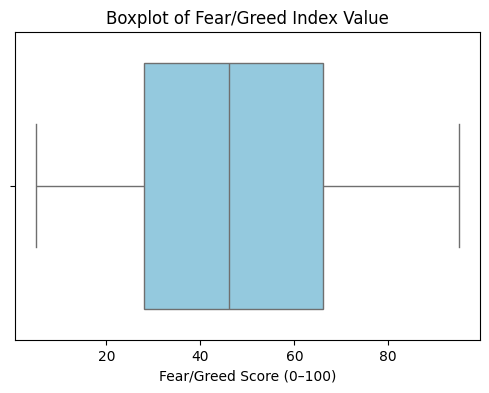

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Fear/Greed index value
plt.figure(figsize=(6, 4))
sns.boxplot(x=sentiment_df['value'], color='skyblue')
plt.title('Boxplot of Fear/Greed Index Value')
plt.xlabel('Fear/Greed Score (0–100)')
plt.show()


## Step 23 – Distribution of Sentiment Classifications

We visualize how the different sentiment classes (`Fear`, `Greed`, `Extreme Fear`, etc.) are distributed over time.  
This countplot helps us understand the **dominant emotional tone** of the market during the dataset period.

Percentage labels are added to each bar for better interpretability.


/tmp/ipython-input-23-3731604198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=sentiment_df, x='classification', palette='coolwarm')


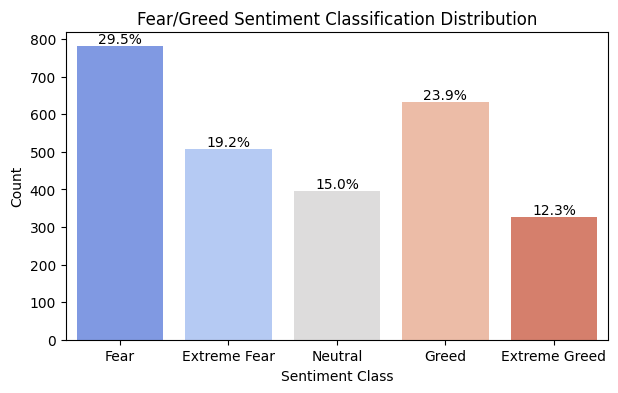

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for 'classification'
plt.figure(figsize=(7, 4))
ax = sns.countplot(data=sentiment_df, x='classification', palette='coolwarm')
plt.title('Fear/Greed Sentiment Classification Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# Add percentage labels
total = len(sentiment_df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


##  Step 24 – Balance Sentiment Classes for Fair Analysis

The sentiment data may have an unequal number of entries for each sentiment type (e.g., more “Fear” days than “Neutral”).

To ensure fair comparison across sentiment classes, we **downsample** each class to match the size of the smallest one:

- All sentiment types are downsampled to the same number of entries
- The dataset is then shuffled to remove ordering bias

This results in a balanced sentiment dataset, ideal for unbiased analysis.


In [24]:
from sklearn.utils import resample
import pandas as pd

# Step 1: Get all sentiment classes
classes = sentiment_df['classification'].unique()

# Step 2: Find the minimum class count
min_count = sentiment_df['classification'].value_counts().min()

# Step 3: Downsample each class
balanced_sentiment_df = pd.concat([
    resample(sentiment_df[sentiment_df['classification'] == cls],
             replace=False,
             n_samples=min_count,
             random_state=42)
    for cls in classes
])

# Step 4: Shuffle the final dataset
balanced_sentiment_df = balanced_sentiment_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 5: Check balance
print(balanced_sentiment_df['classification'].value_counts())


classification
Neutral          326
Fear             326
Greed            326
Extreme Fear     326
Extreme Greed    326
Name: count, dtype: int64


## Step 25 – Visualize Balanced Sentiment Class Distribution

After downsampling, we plot the distribution of sentiment classifications to verify that all classes  
(`Fear`, `Greed`, `Extreme Fear`, etc.) now have equal representation.

This ensures that no sentiment type dominates the analysis or influences trends unfairly.

Percentage labels are added for quick insight into balance accuracy.


/tmp/ipython-input-25-3538387069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=balanced_sentiment_df, x='classification', palette='Set2')


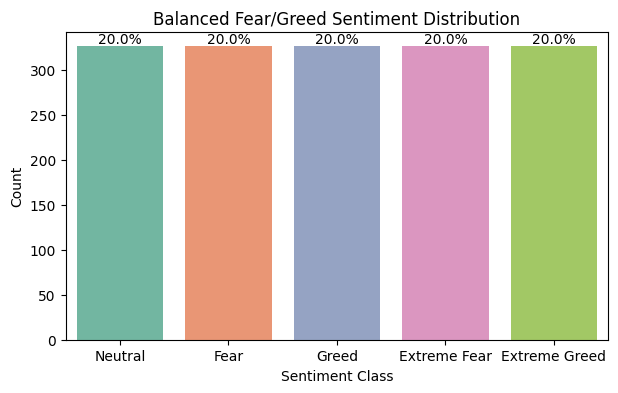

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
ax = sns.countplot(data=balanced_sentiment_df, x='classification', palette='Set2')
plt.title('Balanced Fear/Greed Sentiment Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')

# Add percentages
total = len(balanced_sentiment_df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()


## Step 26 – Ensure Matching Date Formats for Merging

Before merging the historical trader data with the sentiment data, we ensure both datasets have the `date` column in the same format (`datetime.date`).

This is crucial for an accurate join, as mismatched formats would cause the merge to fail or skip valid matches.


In [26]:
df_balanced['date'] = pd.to_datetime(df_balanced['date']).dt.date
balanced_sentiment_df['date'] = pd.to_datetime(balanced_sentiment_df['date']).dt.date
balanced_sentiment_df['date']

,date
0,2023-03-02
1,2021-12-16
2,2024-05-15
3,2020-07-19
4,2022-11-16
...,...
1625,2023-07-06
1626,2023-04-04
1627,2023-01-18
1628,2021-10-07


##  Step 27 – Merge Trader Data with Market Sentiment

We merge the **balanced historical trader data** with the **balanced sentiment data** using the `date` column as the key.

- We use an **inner join** to include only those trades that have matching sentiment information.
- This combined dataset allows us to analyze how sentiment influences trader behavior and outcomes.

We also preview the merged result and its shape.


In [27]:
# Merge on 'date' column (both should be datetime.date format)
merged_df = pd.merge(df_balanced, balanced_sentiment_df, on='date', how='inner')

# Check merged result
print("Merged shape:", merged_df.shape)
merged_df.head()


Merged shape: (33569, 24)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,timestamp_ist,date,log_fee,log_usd,PnL Category,timestamp,value,classification
0,0x8477e447846c758f5a675856001ea72298fd9cb5,kBONK,0.055041,36504.0000,2009.22,BUY,19-11-2024 20:17,-36504.000000,Close Short,-4.197960,...,4.370000e+14,1.730000e+12,2024-11-19 20:17:00,2024-11-19,0.532524,7.605999,Loss,1731994200,90,Extreme Greed
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,HYPE,18.750000,163.2100,3060.19,BUY,23-04-2025 13:14,2452.570000,Open Long,0.000000,...,2.310000e+14,1.750000e+12,2025-04-23 13:14:00,2025-04-23,0.266983,8.026559,Neutral,1745386200,72,Greed
2,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,16.488000,23.8100,392.58,BUY,13-04-2025 07:25,-7916.310000,Close Short,4.076272,...,9.250000e+14,1.740000e+12,2025-04-13 07:25:00,2025-04-13,0.128747,5.975284,Profit,1744522200,45,Neutral
3,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,@107,15.924000,188.3900,2999.92,SELL,04-03-2025 10:25,629.454209,Sell,-140.766890,...,5.500000e+14,1.740000e+12,2025-03-04 10:25:00,2025-03-04,0.641841,8.006674,Loss,1741066200,15,Extreme Fear
4,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,ETH,3420.800000,0.0073,24.97,BUY,24-12-2024 18:50,-27.508800,Close Short,-0.986230,...,1.100000e+15,1.740000e+12,2024-12-24 18:50:00,2024-12-24,0.006223,3.256942,Loss,1735018200,73,Greed


##  Step 28 – Analyze Average Closed PnL by Market Sentiment

In this analysis, we revisit the full dataset and merge it with sentiment data to examine how profitability varies across different sentiment conditions.

Steps performed:

1. Re-loaded both datasets and cleaned column names  
2. Aligned the date formats and merged on `Date`  
3. Handled missing sentiment entries by labeling them as `Unknown`  
4. Converted `Closed PnL` to numeric for analysis  
5. Calculated average `Closed PnL` grouped by sentiment classification  
6. Visualized the result using a bar chart

This helps uncover whether traders are generally more profitable during **Greed**, **Fear**, or **Neutral** market phases.


Missing sentiment entries: 211205

Sentiment counts:
 classification
Unknown          211205
Greed                 7
Neutral               5
Extreme Greed         5
Extreme Fear          1
Fear                  1
Name: count, dtype: int64

Average PnL by sentiment:
 classification
Extreme Fear      0.000000
Extreme Greed     1.205722
Fear             17.980000
Greed            22.903799
Neutral          40.807537
Unknown          48.751547
Name: Closed PnL, dtype: float64


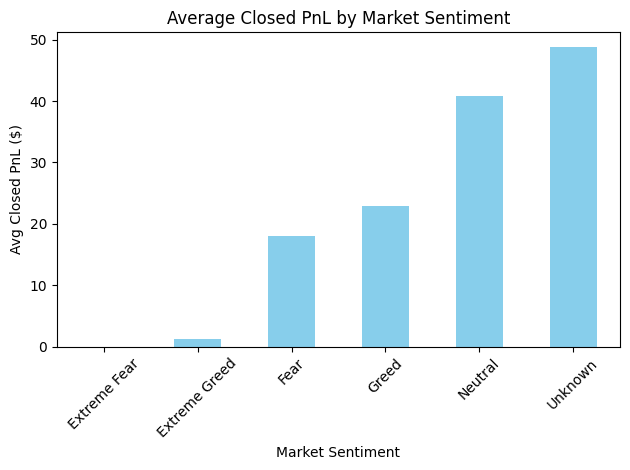

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
historical_df = pd.read_csv("historical_data.csv")
sentiment_df = pd.read_csv("fear_greed_index.csv")

# Clean column names
historical_df.columns = historical_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip()

# Rename columns to have a common 'Date' column
historical_df.rename(columns={"Timestamp IST": "Date"}, inplace=True)
sentiment_df.rename(columns={"date": "Date"}, inplace=True)

# Convert 'Date' columns to datetime
historical_df["Date"] = pd.to_datetime(historical_df["Date"], errors='coerce')
sentiment_df["Date"] = pd.to_datetime(sentiment_df["Date"], errors='coerce')

# Merge on Date
merged_df = pd.merge(historical_df, sentiment_df[["Date", "classification"]], on="Date", how="left")

# Fill missing classifications
missing_sentiments = merged_df["classification"].isna().sum()
print(f"Missing sentiment entries: {missing_sentiments}")
merged_df["classification"] = merged_df["classification"].fillna("Unknown")

# Check counts
print("\nSentiment counts:\n", merged_df["classification"].value_counts())

# Convert Closed PnL to numeric
merged_df["Closed PnL"] = pd.to_numeric(merged_df["Closed PnL"], errors='coerce')

# Average Closed PnL per sentiment
avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean()
print("\nAverage PnL by sentiment:\n", avg_pnl)

# Plot bar chart
avg_pnl.plot(kind="bar", color="skyblue", title="Average Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Avg Closed PnL ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Step 29 – Save the Cleaned & Merged Dataset

After completing cleaning, transformation, and merging of trader and sentiment data,  
we export the final dataset to a CSV file named **`cleaned_merged_data.csv`**.

This file can now be used for further analysis, modeling, or submission.


In [29]:
# Save the cleaned merged dataset to a new CSV file
merged_df.to_csv("cleaned_merged_data.csv", index=False)

print("Cleaned and merged dataset saved as 'cleaned_merged_data.csv'")


Cleaned and merged dataset saved as 'cleaned_merged_data.csv'


## Step 30 – Horizontal Bar Chart: Avg Closed PnL by Sentiment

We create a **horizontal bar chart** to visualize the average `Closed PnL` across different sentiment classifications.

- Sorted from lowest to highest to clearly compare performance.
- Green color and gridlines improve readability and presentation quality.
- This chart reveals which sentiment periods (e.g., Fear, Greed) tend to be more or less profitable for traders.

It provides a powerful insight into how emotions drive profitability.


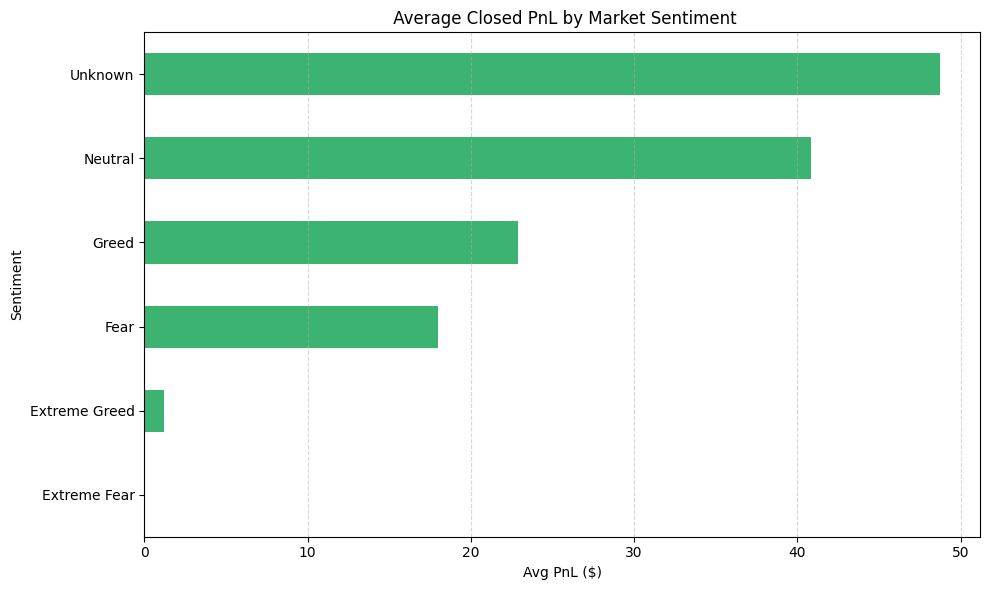

In [30]:
avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean().sort_values()
avg_pnl.plot(kind="barh", color="mediumseagreen", figsize=(10, 6))
plt.title(" Average Closed PnL by Market Sentiment")
plt.xlabel("Avg PnL ($)")
plt.ylabel("Sentiment")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Step 31 – Boxplot: Risk vs Reward by Market Sentiment

We use a boxplot to analyze the **distribution of `Closed PnL`** across different market sentiments.

This helps us evaluate:

- The **spread (risk)** of outcomes in each sentiment type
- The **median (typical reward)** during each sentiment
- Potential outliers that show extreme profits or losses

It's a great way to visualize volatility and profitability under different emotional market conditions.


/tmp/ipython-input-31-3567744777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="classification", y="Closed PnL", palette="Set2")


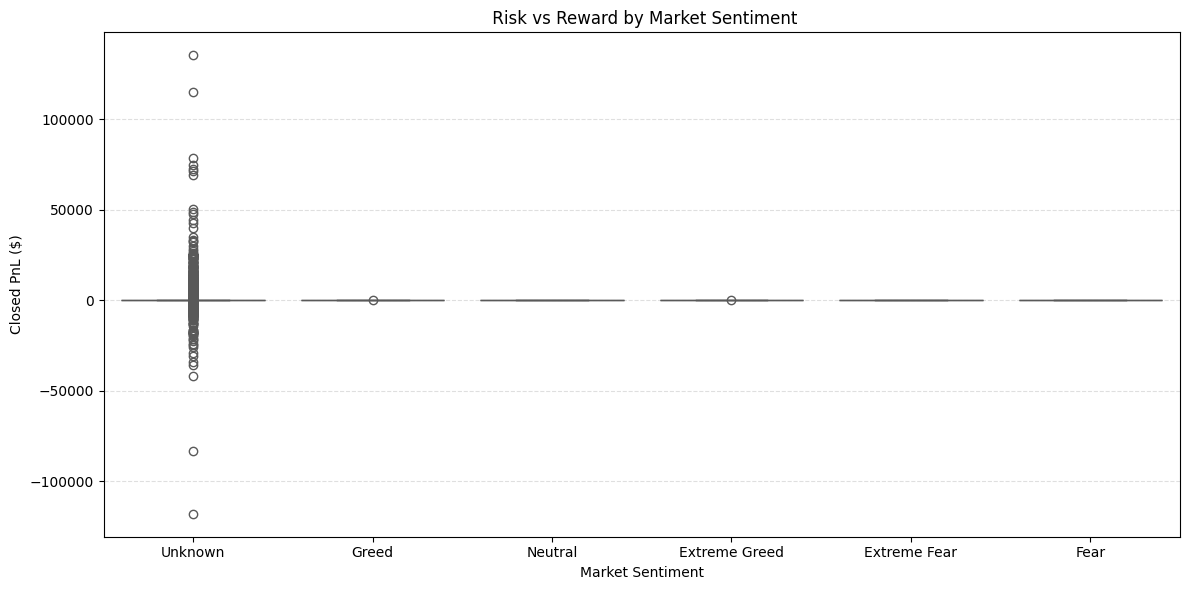

In [31]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="classification", y="Closed PnL", palette="Set2")
plt.title(" Risk vs Reward by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL ($)")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Step 32 – Volume of Trades by Sentiment

We visualize the **number of trades** that occurred under each sentiment classification using a bar chart.

This helps us understand:

- Which sentiment phases dominate the dataset
- How much trading activity happens during different emotional market states
- Whether high or low volume correlates with profitability or risk

This context is important when interpreting performance trends across sentiments.


/tmp/ipython-input-32-1189956537.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


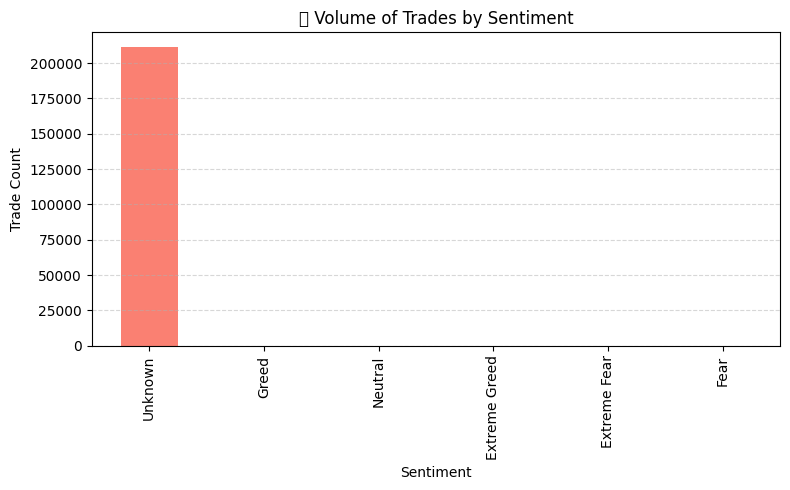

In [32]:
volume = merged_df["classification"].value_counts()
volume.plot(kind="bar", color="salmon", figsize=(8, 5))
plt.title("📊 Volume of Trades by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Trade Count")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Step 33 – Inspect Column Names for Validation

We print out the column names from both datasets to:

- Ensure there are no leading/trailing whitespaces
- Verify that expected columns (like `classification`, `Closed PnL`, etc.) exist
- Check column consistency before merging or analysis

This step helps prevent errors in column references later in the pipeline.


In [33]:
print("Trader Data Columns:\n", df.columns)
print("\nSentiment Data Columns:\n", sentiment_df.columns)


Trader Data Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'timestamp_ist', 'date', 'log_fee', 'log_usd',
       'PnL Category'],
      dtype='object')

Sentiment Data Columns:
 Index(['timestamp', 'value', 'classification', 'Date'], dtype='object')


##  Step 34 – Standardize Date Columns for Merging

To prepare both datasets for consistent merging:

- We ensure the trader dataset has a column named `date` in `datetime` format.
- We rename the `Date` column in the sentiment dataset to `date` and convert it to datetime as well.

This standardization is essential for smooth and accurate merging based on temporal alignment.


In [34]:
# For trader data — already named 'date'
df['date'] = pd.to_datetime(df['date'])

# For sentiment data — rename 'Date' to 'date' and convert
sentiment_df.rename(columns={'Date': 'date'}, inplace=True)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['date']

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05
...,...
2639,2025-04-28
2640,2025-04-29
2641,2025-04-30
2642,2025-05-01


## Step 35 – Keep Only Relevant Columns from Sentiment Data

To simplify analysis and reduce noise, we retain only the key columns from the sentiment dataset:

- `date`: Used for merging with trader data  
- `classification`: Market sentiment label (e.g., Fear, Greed)  
- `value`: Numerical Fear & Greed score (0–100)

This ensures our dataset remains clean, focused, and ready for efficient merging or analysis.


In [35]:
# Keep only the columns we care about
sentiment_df = sentiment_df[['date', 'classification', 'value']]
sentiment_df

,date,classification,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11
...,...,...,...
2639,2025-04-28,Neutral,54
2640,2025-04-29,Greed,60
2641,2025-04-30,Greed,56
2642,2025-05-01,Neutral,53


## Step 36 – Final Merge: Trader Data with Sentiment Insights

We now perform the final merge of the trader dataset with the cleaned sentiment data using the `date` column.

This step enriches each trade record with:
- `classification`: the market sentiment on the trade's date
- `value`: the Fear & Greed index score for deeper numeric analysis

With this merge complete, we can now analyze how market sentiment influences trade behavior, performance, and strategy.


In [36]:
# Merge sentiment into trader data using the 'date' column
merged_df = pd.merge(df, sentiment_df, on='date', how='left')
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,timestamp_ist,date,log_fee,log_usd,PnL Category,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.00000,...,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,0.296695,8.971215,Neutral,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.00000,...,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,0.005584,4.857329,Neutral,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.00000,...,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,0.049201,7.048934,Neutral,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.00000,...,0.050043,1.080000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,0.048831,7.041447,Neutral,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.00000,...,0.003055,1.050000e+15,1.730000e+12,2024-12-02 22:50:00,2024-12-02,0.003051,4.259153,Neutral,Extreme Greed,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.25660,...,0.042080,1.990000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,0.041219,6.044531,Loss,Greed,60.0
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.57730,...,0.233863,9.260000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,0.210150,7.757748,Loss,Greed,60.0
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.44020,...,0.046616,6.930000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,0.045562,6.146672,Loss,Greed,60.0
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-140.76689,...,0.396337,4.180000e+14,1.750000e+12,2025-04-25 15:35:00,2025-04-25,0.333852,8.285105,Loss,Greed,60.0


## Step 37 – Preview Merged Sentiment Columns

We preview the merged sentiment data (`classification` and `value`) alongside the `date` column to ensure:

- Sentiment data has successfully joined with each trade
- Date alignment was accurate
- The data is ready for sentiment-based behavioral analysis

This confirmation helps verify that the enriched dataset is correct before continuing with deeper insights or modeling.


In [37]:
merged_df[['date', 'classification', 'value']].head()


,date,classification,value
0,2024-12-02,Extreme Greed,80.0
1,2024-12-02,Extreme Greed,80.0
2,2024-12-02,Extreme Greed,80.0
3,2024-12-02,Extreme Greed,80.0
4,2024-12-02,Extreme Greed,80.0


## Step 38 – Check for Missing Sentiment After Merge

After merging sentiment into the trader data, we check how many trades **do not have a matching sentiment** by counting the number of `NaN` entries in the `classification` column.

This ensures:

- Awareness of data gaps
- Helps decide whether to impute, label as 'Unknown', or drop these rows before analysis


In [38]:
missing_sentiment = merged_df['classification'].isnull().sum()
print(f"Number of trades with missing sentiment: {missing_sentiment}")


Number of trades with missing sentiment: 6


## Step 39 – Fill Missing Sentiment Using Forward Fill

To handle missing sentiment values after the merge, we apply **forward fill (`method='ffill'`)**, which:

- Propagates the **most recent available sentiment** value forward
- Assumes that sentiment stays consistent until the next update (a reasonable assumption in daily index data)

This ensures that all trades have a corresponding sentiment label and score, enabling uninterrupted analysis and modeling.


In [39]:
# Fill missing sentiment using the most recent available value before it
merged_df[['classification', 'value']] = merged_df[['classification', 'value']].fillna(method='ffill')


/tmp/ipython-input-39-3385365665.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[['classification', 'value']] = merged_df[['classification', 'value']].fillna(method='ffill')


## Step 40 – Forward Fill (Shorthand) for Missing Sentiment

We reapply **forward fill** using `.ffill()` to ensure all missing `classification` and `value` entries are filled with the last known sentiment.

This guarantees:

- No missing sentiment labels remain
- All trade entries are sentiment-enriched


In [40]:
merged_df[['classification', 'value']] = merged_df[['classification', 'value']].ffill()
merged_df[['classification', 'value']]

,classification,value
0,Extreme Greed,80.0
1,Extreme Greed,80.0
2,Extreme Greed,80.0
3,Extreme Greed,80.0
4,Extreme Greed,80.0
...,...,...
211219,Greed,60.0
211220,Greed,60.0
211221,Greed,60.0
211222,Greed,60.0


## Step 41 – Number of Trades per Market Sentiment Category

We visualize how trade activity is distributed across different sentiment levels (`Extreme Fear` to `Extreme Greed`).

- This helps us identify whether more trades occur during bullish or bearish emotional phases.
- It also helps assess if some sentiment states are underrepresented in the data.

The color palette (`coolwarm`) and sorted order enhance the clarity of this plot.


/tmp/ipython-input-41-1765844150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette='coolwarm')


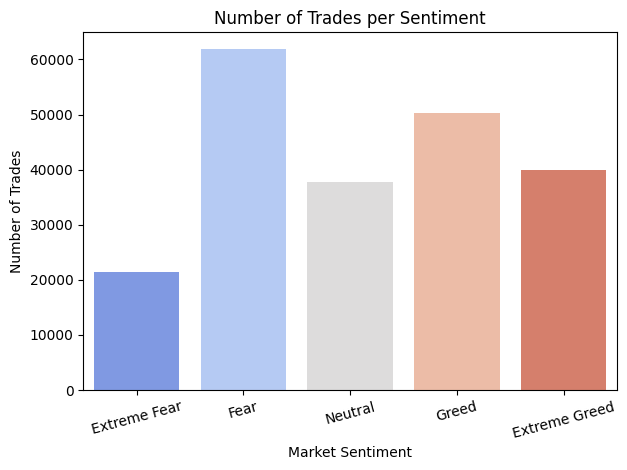

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of trades per sentiment category
sns.countplot(data=merged_df, x='classification', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'], palette='coolwarm')
plt.title('Number of Trades per Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Step 42 – Finalized Plot: Number of Trades by Market Sentiment

We finalize the countplot showing how many trades occurred under each **market sentiment classification**:

- Sentiment classes are ordered logically from **Extreme Fear** to **Extreme Greed**
- This helps clearly visualize if certain emotional states drive more trading activity
- A clean color palette and spacing make it presentation-ready

This plot forms a strong visual base for understanding behavioral shifts in trading volume.


/tmp/ipython-input-42-1709485069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


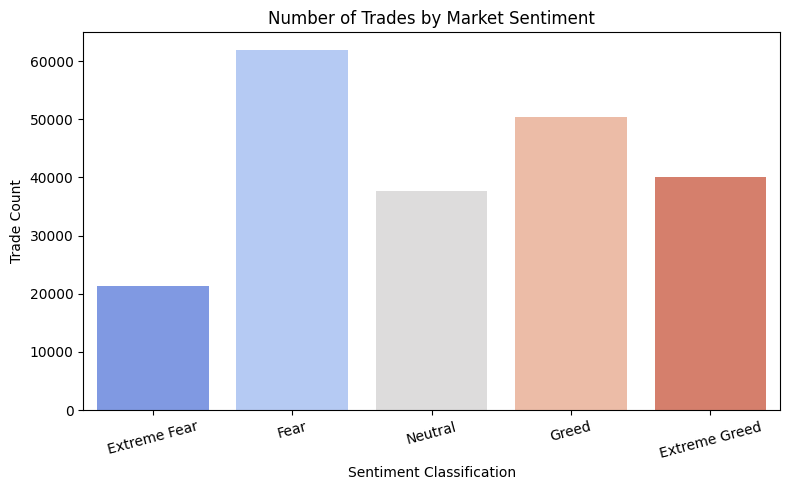

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=merged_df,
    x='classification',
    hue=None,
    palette='coolwarm',
    order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']  # correct order
)
plt.title('Number of Trades by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Trade Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Step 43 – Define Logical Sentiment Order for Consistent Visuals

We define a custom **sentiment order** to ensure consistent and intuitive display across all visualizations:

```python
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']


## Step 44 – Average Closed PnL by Market Sentiment

We analyze how profitability varies across different market sentiment classifications using a **bar plot with standard deviation bars**.

- The plot shows the **average Closed PnL** for each sentiment group (e.g., Fear, Greed)
- The `errorbar='sd'` argument adds variability info (standard deviation) for more context
- Sentiment categories are ordered from most fearful to most greedy

This chart helps identify which emotional market states lead to higher or lower profitability for traders.


/tmp/ipython-input-43-2572435834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


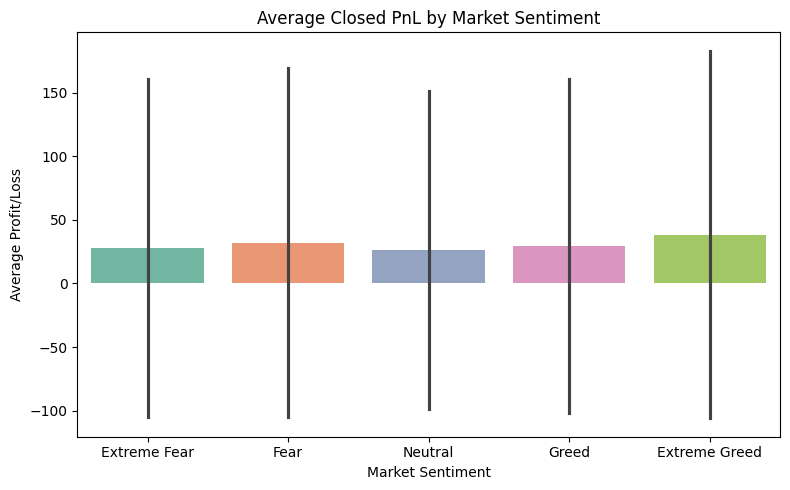

In [43]:
# Step 2 – Average Closed PnL by Market Sentiment (Updated Syntax)

sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

plt.figure(figsize=(8, 5))
sns.barplot(
    data=merged_df,
    x='classification',
    y='Closed PnL',
    order=sentiment_order,
    estimator='mean',
    errorbar='sd',   # updated version of ci='sd'
    hue=None,
    palette='Set2'
)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Profit/Loss')
plt.tight_layout()
plt.show()


## Step 45 – Filter Invalid or Negative Start Positions

To improve data quality before further analysis, we:

- **Remove trades with `Start Position` ≤ 0**, which may be erroneous or uninformative
- Create a filtered dataset `filtered_df` for cleaner insights

This step is especially important for metrics like leverage or position-based risk analysis.


In [44]:
# Optional: Remove outliers or negative start positions
filtered_df = merged_df[merged_df["Start Position"] > 0]

# Then re-run the average and boxplot analysis on `filtered_df`


## Step 46 – Start Position as a Proxy for Leverage by Market Sentiment

Since direct leverage values may be missing or unreliable, we use **`Start Position`** as a **proxy for leverage**.

### Actions:
- Dropped rows with missing sentiment (`classification`)
- Calculated the average start position for each sentiment type
- Visualized the full distribution using a **boxplot** for deeper understanding

This helps identify whether traders tend to open **larger positions (higher leverage)** during Fear vs Greed scenarios.


Average Start Position by Market Sentiment (used as leverage proxy):
classification
Extreme Fear      8036.499621
Extreme Greed     8278.229385
Fear              8475.152569
Greed           -39172.231153
Neutral           1368.884864
Name: Start Position, dtype: float64


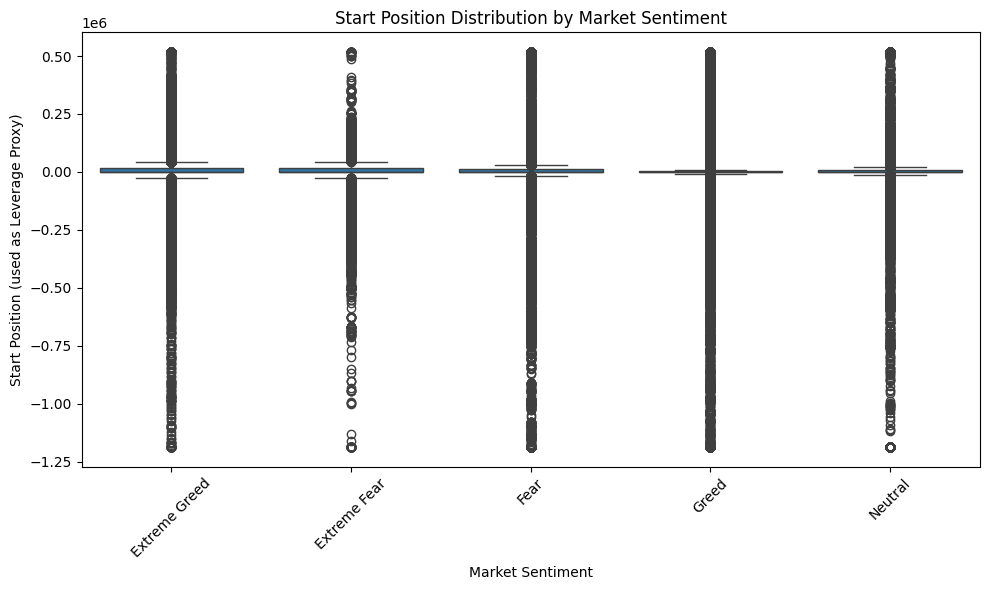

In [45]:
# Drop rows with missing sentiment labels
merged_df = merged_df.dropna(subset=["classification"])

# Average start position per sentiment type (as proxy for leverage)
leverage_by_sentiment = merged_df.groupby("classification")["Start Position"].mean()
print("Average Start Position by Market Sentiment (used as leverage proxy):")
print(leverage_by_sentiment)

# Visualize the result
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="classification", y="Start Position", data=merged_df)
plt.title("Start Position Distribution by Market Sentiment")
plt.ylabel("Start Position (used as Leverage Proxy)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Step 47 – Distribution of Start Position by Market Sentiment (Boxplot View)

We plot the **boxplot of `Start Position`** across sentiment categories to visualize position size tendencies:

- `Start Position` is used as a **proxy for leverage**
- The `order` ensures sentiments flow from Extreme Fear to Extreme Greed
- Using `Set3` palette for visual distinction

This distribution highlights **how aggressive or conservative traders are** under different market moods.


/tmp/ipython-input-46-4235140563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


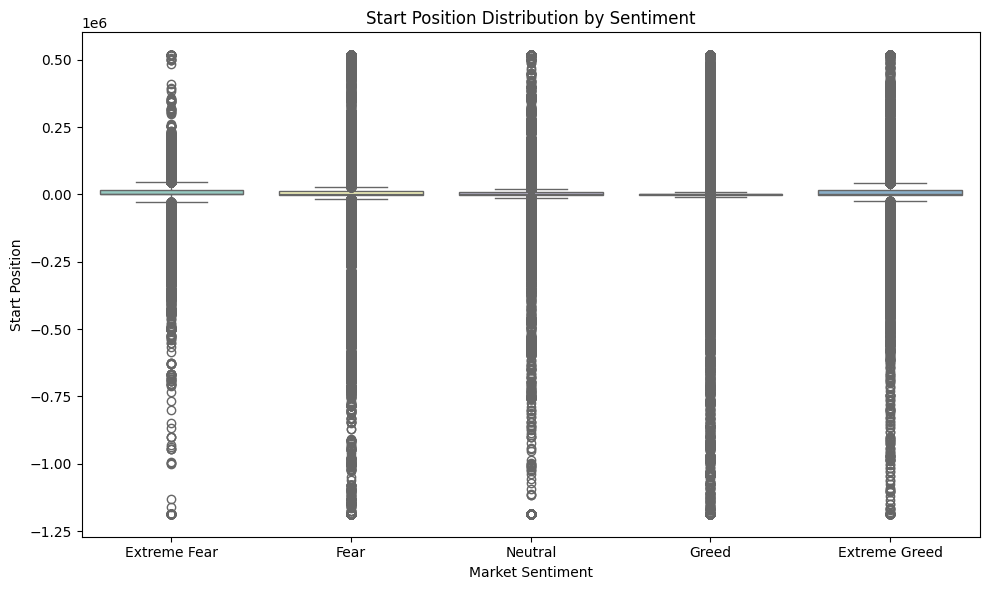

In [46]:
# Step 3 – Distribution of Start Position by Market Sentiment

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='Start Position',
    order=sentiment_order,
    palette='Set3'
)
plt.title('Start Position Distribution by Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Start Position')
plt.tight_layout()
plt.show()


## Step 48 – Average Trade Size (USD) by Market Sentiment

We visualize how the **average trade size** in USD changes across different sentiment categories.

### Why this matters:
- Helps understand **risk appetite** under various market emotions
- Larger trades during "Greed" may indicate **overconfidence**, while smaller trades during "Fear" may show **risk aversion**

We use:
- `estimator='mean'` to show average size
- `errorbar='sd'` to capture variability
- The custom `sentiment_order` for consistent comparison


/tmp/ipython-input-47-454272299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


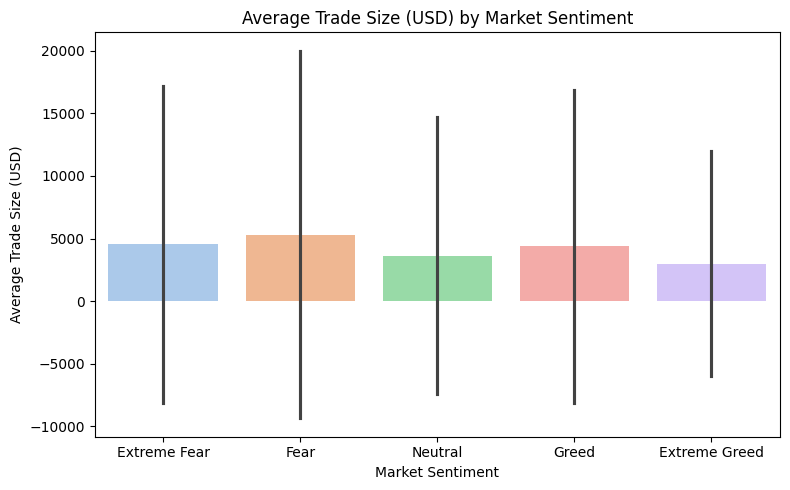

In [47]:
# Step 4 – Average Trade Size (USD) by Market Sentiment

plt.figure(figsize=(8, 5))
sns.barplot(
    data=merged_df,
    x='classification',
    y='Size USD',
    order=sentiment_order,
    estimator='mean',
    errorbar='sd',   # use ci='sd' if using older seaborn
    palette='pastel'
)
plt.title('Average Trade Size (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.tight_layout()
plt.show()


## Step 49 – Average Fee Paid by Market Sentiment

This plot explores how much traders **pay in fees** depending on the prevailing market sentiment.

### Why it’s insightful:
- Higher fees might reflect **larger or more frequent trades** in bullish conditions (Greed)
- Lower fees might reflect **cautious trading** in fearful markets

We use:
- Mean (`estimator='mean'`) to assess average cost
- Standard deviation (`errorbar='sd'`) for fee variability
- `sentiment_order` to ensure emotional flow across the x-axis

This reveals how trader costs scale with sentiment-driven behavior.


/tmp/ipython-input-48-3737215654.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


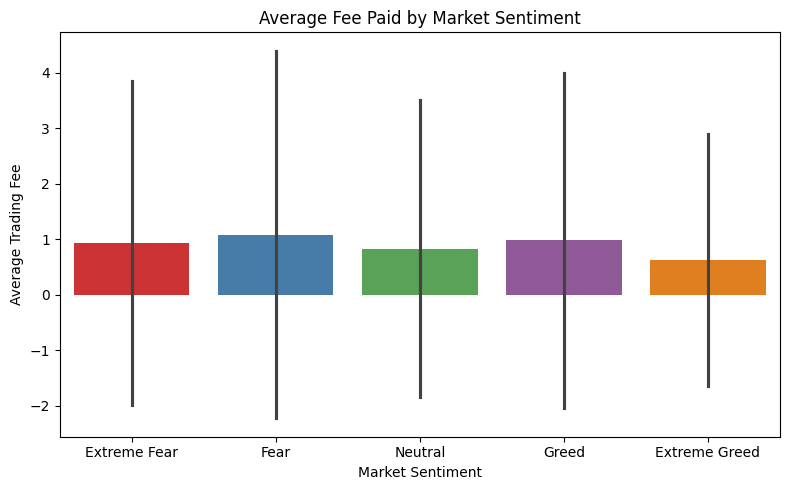

In [48]:
# Step 5 – Average Fee Paid by Market Sentiment

plt.figure(figsize=(8, 5))
sns.barplot(
    data=merged_df,
    x='classification',
    y='Fee',
    order=sentiment_order,
    estimator='mean',
    errorbar='sd',  # if you're on older seaborn, use ci='sd'
    palette='Set1'
)
plt.title('Average Fee Paid by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Trading Fee')
plt.tight_layout()
plt.show()


## Step 50 – Execution Price Distribution by Market Sentiment

We examine how **execution prices** vary across different emotional market states using a boxplot.

### Key objectives:
- Identify if traders tend to buy/sell at **higher prices in Greed** and **lower in Fear**
- Spot pricing volatility by sentiment (shown via spread of boxes)

We use:
- `sentiment_order` to maintain consistent emotional flow
- `Set2` palette for soft, clear contrast
- Boxplot to show **median**, **IQR**, and **outliers**

This step adds market context to our behavioral analysis — connecting **price levels** with **trader emotions**.


/tmp/ipython-input-49-1482459532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


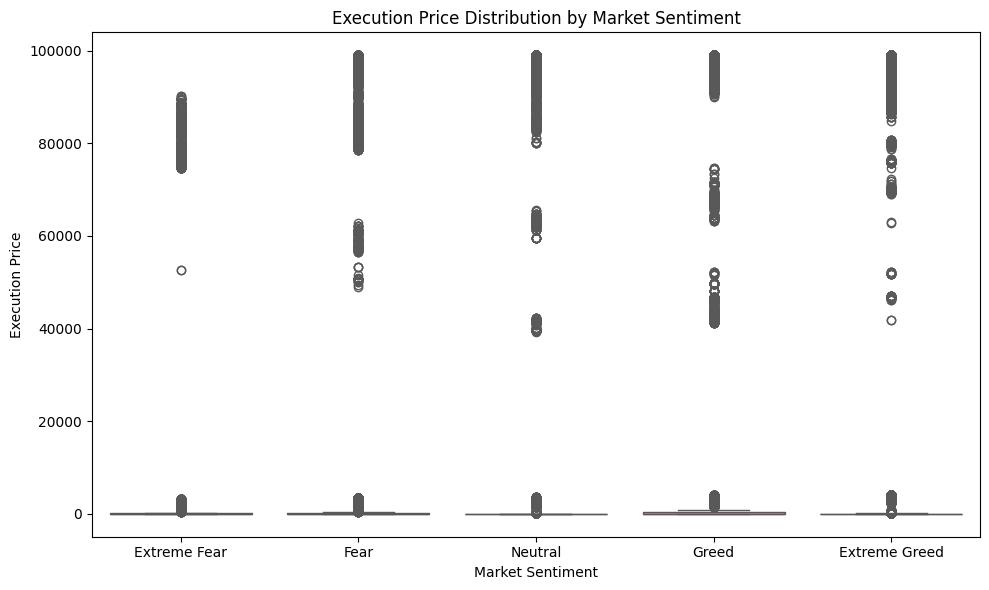

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='Execution Price',
    order=sentiment_order,  # ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
    palette='Set2'
)
plt.title('Execution Price Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Execution Price')
plt.tight_layout()
plt.show()


## Step 51 – Estimate Inter-Trade Duration by Market Sentiment

We calculate and visualize how much time typically passes **between trades for each account** across different sentiment states.

### Key Steps:
1. Convert `Timestamp IST` to datetime format
2. Sort by `Account` and `Timestamp IST`
3. Calculate **inter-trade duration (in minutes)** per account using `diff()`
4. Remove NaN values from first trades per account
5. Plot inter-trade durations grouped by sentiment

### Why this matters:
- **Shorter durations** in “Greed” may signal rapid-fire or FOMO behavior
- **Longer gaps** in “Fear” could indicate hesitation or uncertainty
- We use a **log scale** to manage skewed timing data

This metric offers deep insight into **how quickly traders react** under emotional market conditions.


/tmp/ipython-input-50-2643625563.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


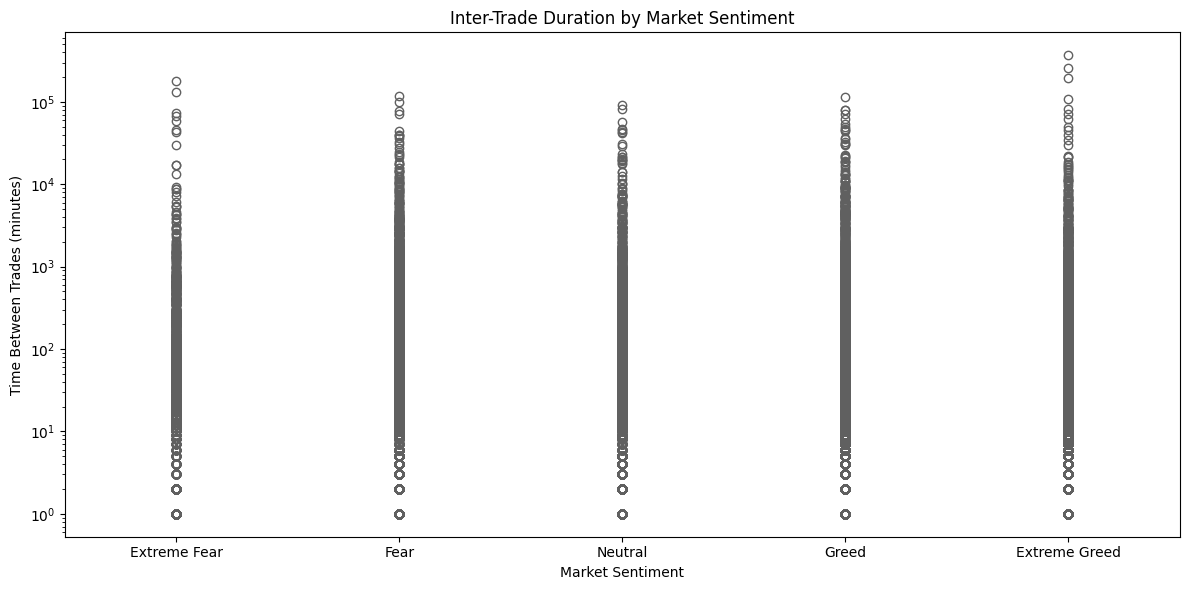

In [50]:
# STEP 7 – Estimate Inter-Trade Duration (Updated Date Parsing)

# 1. Convert 'Timestamp IST' to datetime (with dayfirst)
merged_df['Timestamp IST'] = pd.to_datetime(merged_df['Timestamp IST'], dayfirst=True, errors='coerce')

# 2. Sort by account and time
merged_df = merged_df.sort_values(by=['Account', 'Timestamp IST'])

# 3. Calculate time difference between trades (minutes)
merged_df['inter_trade_duration'] = merged_df.groupby('Account')['Timestamp IST'].diff().dt.total_seconds() / 60

# 4. Drop NaNs created for first trades per account
filtered_df = merged_df.dropna(subset=['inter_trade_duration'])

# 5. Visualization: Inter-trade duration by sentiment
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df,
    x='classification',
    y='inter_trade_duration',
    order=sentiment_order,
    palette='coolwarm'
)
plt.title('Inter-Trade Duration by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Time Between Trades (minutes)')
plt.yscale('log')  # Log scale to handle skew
plt.tight_layout()
plt.show()


## Step 52 – View All Available Columns in Merged Dataset

Before modeling or further analysis, we inspect all available columns in the `merged_df` to:

- Confirm that sentiment and trade data have been merged correctly
- Identify which features are useful for modeling or deeper insights (e.g., `Closed PnL`, `Fee`, `Start Position`, `classification`, etc.)
- Spot unnecessary or redundant columns for potential removal

This step ensures we understand the **full structure** of the cleaned dataset.


In [51]:
print(merged_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'timestamp_ist', 'date', 'log_fee', 'log_usd',
       'PnL Category', 'classification', 'value', 'inter_trade_duration'],
      dtype='object')


## Step 53 – Convert Trade Size to Numeric Format

We ensure the `Size USD` column is stored as a proper **numeric type**:

```python
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')


In [52]:
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')
merged_df['Size USD']

,Size USD
14229,2293.26
14230,6419.20
14231,14851.78
14232,8024.00
14233,30000.45
...,...
195771,3887.94
195772,4845.54
195773,1062.99
195774,4960.16


## Step 54 – Drop Rows with Missing Key Features

To maintain data quality, we drop rows where **essential columns** are missing:

```python
merged_df = merged_df.dropna(subset=['Coin', 'classification', 'Size USD'])


In [53]:
merged_df = merged_df.dropna(subset=['Coin', 'classification', 'Size USD'])
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Trade ID,Timestamp,timestamp_ist,date,log_fee,log_usd,PnL Category,classification,value,inter_trade_duration
14229,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,0.7145,2293.26,SELL,2024-11-11 08:28:00,0.0000,Open Short,0.000000,...,5.260000e+14,1.730000e+12,2024-11-11 08:28:00,2024-11-11,0.589252,7.738166,Neutral,Extreme Greed,76.0,NaN
14230,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,2.0000,6419.20,SELL,2024-11-11 08:28:00,-0.7145,Open Short,0.000000,...,5.780000e+14,1.730000e+12,2024-11-11 08:28:00,2024-11-11,1.177645,8.767205,Neutral,Extreme Greed,76.0,0.0
14231,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,4.6273,14851.78,SELL,2024-11-11 08:28:00,-2.7145,Open Short,0.000000,...,5.490000e+14,1.730000e+12,2024-11-11 08:28:00,2024-11-11,1.824247,9.605942,Neutral,Extreme Greed,76.0,0.0
14232,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,2.5000,8024.00,SELL,2024-11-11 08:28:00,-7.3418,Open Short,0.000000,...,3.170000e+14,1.730000e+12,2024-11-11 08:28:00,2024-11-11,1.337209,8.990317,Neutral,Extreme Greed,76.0,0.0
14233,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,9.3471,30000.45,SELL,2024-11-11 08:28:00,-9.8418,Open Short,0.000000,...,5.450000e+14,1.730000e+12,2024-11-11 08:28:00,2024-11-11,2.442361,10.309001,Neutral,Extreme Greed,76.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195771,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.506,199.3200,3887.94,BUY,2025-05-01 08:53:00,-875.2800,Close Short,61.510152,...,8.860000e+14,1.750000e+12,2025-05-01 08:53:00,2025-05-01,0.773058,8.265892,Profit,Neutral,53.0,0.0
195772,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.507,248.4000,4845.54,BUY,2025-05-01 08:53:00,-675.9600,Close Short,76.407840,...,5.410000e+14,1.750000e+12,2025-05-01 08:53:00,2025-05-01,0.897581,8.486020,Profit,Neutral,53.0,0.0
195773,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.508,54.4900,1062.99,BUY,2025-05-01 08:53:00,-427.5600,Close Short,16.706634,...,4.730000e+14,1.750000e+12,2025-05-01 08:53:00,2025-05-01,0.276796,6.969781,Profit,Neutral,53.0,0.0
195774,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.509,254.2500,4960.16,BUY,2025-05-01 08:53:00,-373.0700,Close Short,77.698800,...,1.960000e+14,1.750000e+12,2025-05-01 08:53:00,2025-05-01,0.911498,8.509395,Profit,Neutral,53.0,0.0


## Step 55 – Total Trade Volume by Coin and Market Sentiment

We analyze how trading activity (in USD) varies by coin and sentiment:

### Steps:
- Grouped data by `Coin` and `classification` to get total trade volume
- Filtered to top 15 most-traded coins for clear comparison
- Plotted a grouped bar chart with sentiment hue

### Insights You Can Extract:
- Which coins are traded more during **Greed** vs **Fear**
- Whether sentiment disproportionately affects **certain assets**
- Identify if any coins behave contrary to market emotion

This visualization supports **asset-level behavior analysis** under different sentiment scenarios.


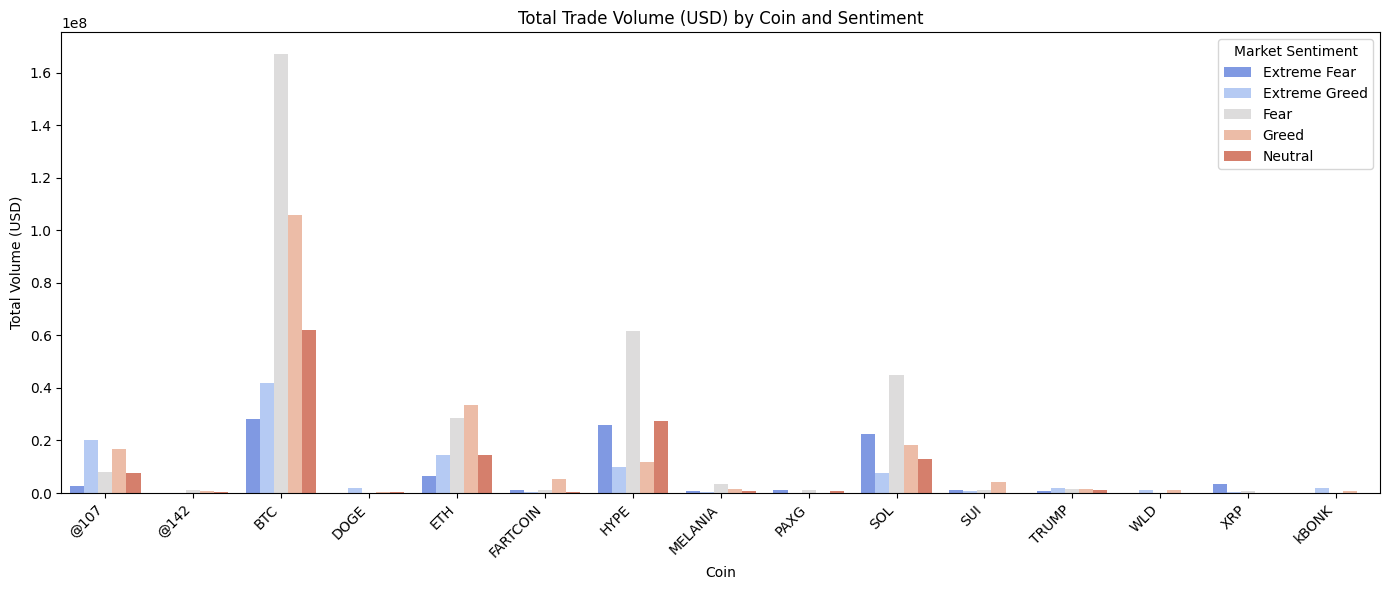

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

# Group by Coin and classification to get total trade volume
volume_df = merged_df.groupby(['Coin', 'classification'])['Size USD'].sum().reset_index()

# Filter top 15 coins by total volume (optional for clarity)
top_coins = volume_df.groupby('Coin')['Size USD'].sum().nlargest(15).index
volume_df = volume_df[volume_df['Coin'].isin(top_coins)]

# Plot total trade volume
plt.figure(figsize=(14, 6))
sns.barplot(
    data=volume_df,
    x='Coin',
    y='Size USD',
    hue='classification',
    palette='coolwarm'
)
plt.title('Total Trade Volume (USD) by Coin and Sentiment')
plt.xlabel('Coin')
plt.ylabel('Total Volume (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Market Sentiment')
plt.tight_layout()
plt.show()


## Step 56 – Trade Count by Coin and Market Sentiment

Here we analyze **how many trades** were executed per coin, broken down by sentiment classification.

### What we did:
- Grouped by `Coin` and `classification` to count number of trades
- Filtered for top 15 coins with highest trade counts
- Visualized with a grouped bar chart using `Spectral` color palette

### Why it’s important:
- Helps identify **high-activity coins** under each sentiment type
- Shows **trader interest shifts** across emotional market conditions
- Complements the previous analysis on **total trade volume**

Together with trade volume, this gives a complete picture of **trading intensity vs. emotional states per asset**.


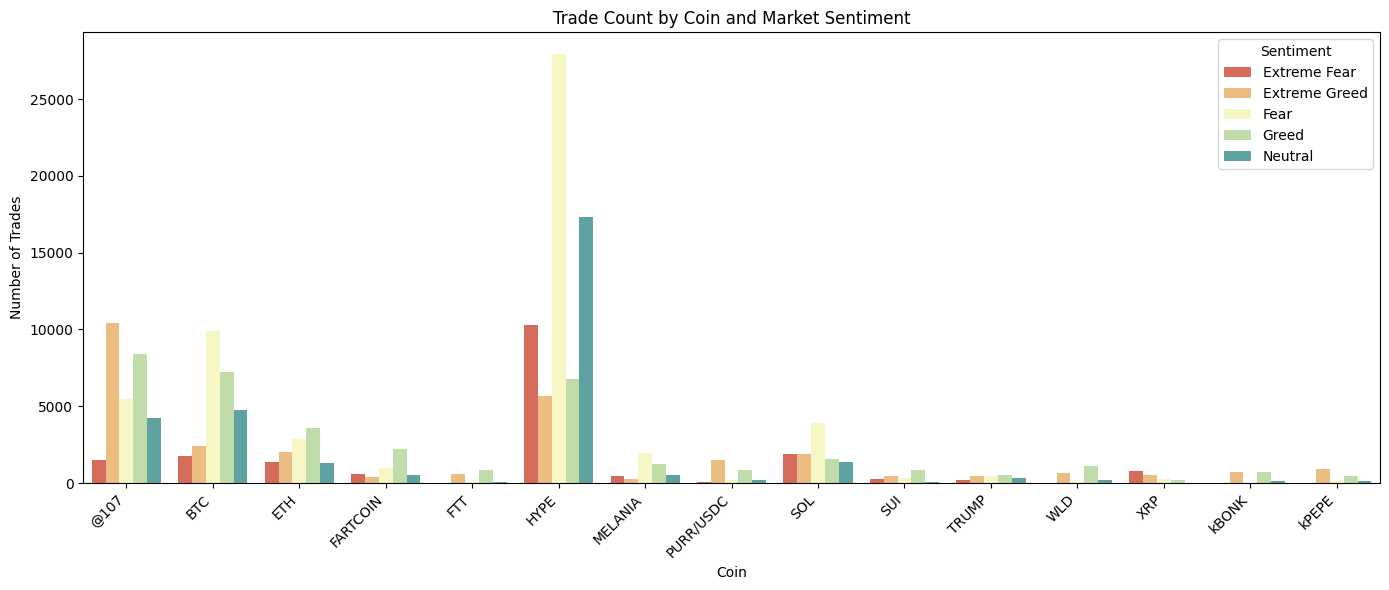

In [55]:
# Group by Coin and classification to count trades
count_df = merged_df.groupby(['Coin', 'classification']).size().reset_index(name='Trade Count')

# Filter top 15 coins by trade count (optional)
top_coins_count = count_df.groupby('Coin')['Trade Count'].sum().nlargest(15).index
count_df = count_df[count_df['Coin'].isin(top_coins_count)]

# Plot trade count
plt.figure(figsize=(14, 6))
sns.barplot(
    data=count_df,
    x='Coin',
    y='Trade Count',
    hue='classification',
    palette='Spectral'
)
plt.title('Trade Count by Coin and Market Sentiment')
plt.xlabel('Coin')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


## Step 57 – Correlation Heatmap of Key Trading Metrics

To understand how trading variables relate to each other, we created a **correlation matrix**:

### Columns Included:
- `Execution Price`
- `Size Tokens` and `Size USD`
- `Closed PnL`
- `Fee`, `log_fee`, `log_usd`
- `value` (from Fear/Greed Index)
- `inter_trade_duration` (time gap between trades)

### Why this is important:
- Reveals **positive or negative relationships** between numerical features
- Helps detect **multicollinearity** for modeling
- Identifies which features are **strong predictors** of trading outcomes (like PnL)

The color-coded heatmap (using `coolwarm`) makes it easy to spot **strong correlations** (above ±0.7) that might affect modeling or interpretation.


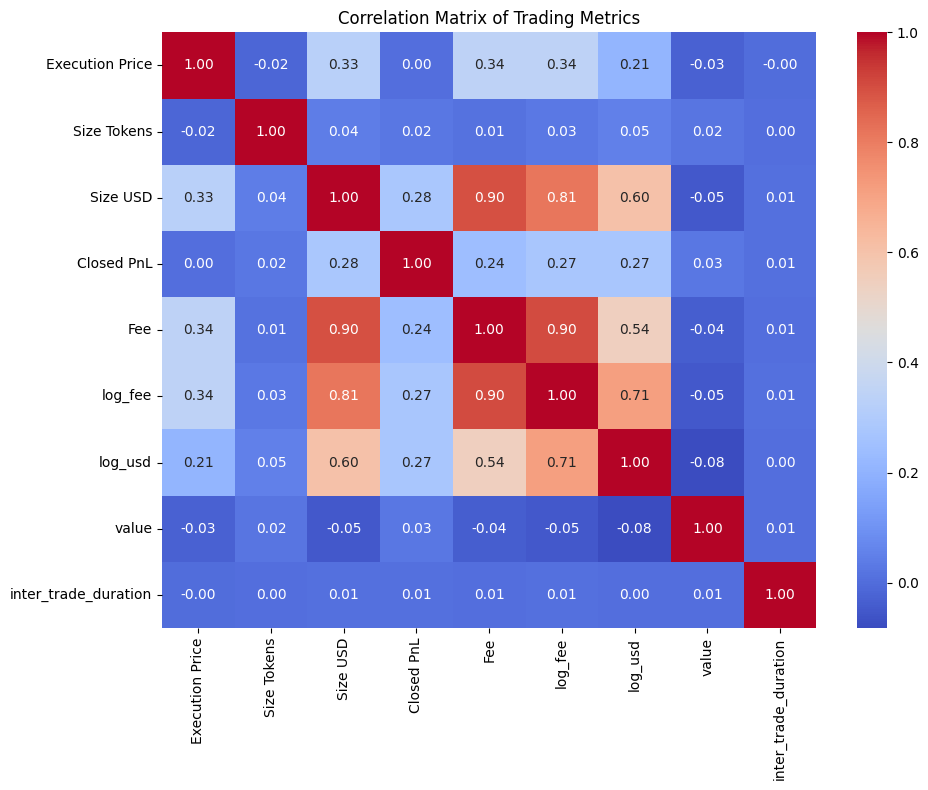

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical features
numeric_cols = ['Execution Price', 'Size Tokens', 'Size USD', 'Closed PnL', 'Fee', 'log_fee', 'log_usd', 'value', 'inter_trade_duration']
corr_matrix = merged_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trading Metrics')
plt.tight_layout()
plt.show()


## Step 58 – Encode Market Sentiment for Modeling

To use **market sentiment classification** in machine learning models, we need to convert text labels into numeric values.

### Tool Used:
- `LabelEncoder()` from `sklearn.preprocessing`

### Example Encoding:
- `Extreme Fear` → 0  
- `Fear` → 1  
- `Neutral` → 2  
- `Greed` → 3  
- `Extreme Greed` → 4

### Why it's needed:
- Most ML models require numeric input — this step enables use of sentiment as a feature or target.


In [57]:
# Example: Encode sentiment classification
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_df['sentiment_encoded'] = le.fit_transform(merged_df['classification'])
merged_df['sentiment_encoded']
# Now 'Extreme Fear' → 0, 'Fear' → 1, etc.


,sentiment_encoded
14229,1
14230,1
14231,1
14232,1
14233,1
...,...
195771,4
195772,4
195773,4
195774,4


## Step 59 – One-Hot Encode Categorical Variables for Modeling

To prepare our data for machine learning models, we need to convert text-based categorical columns into numeric format. This is done using **One-Hot Encoding**, which creates binary (0/1) columns for each category.

### Tool Used:
- `pd.get_dummies()` from pandas

### Columns Encoded:
- `classification` → Market Sentiment (`Extreme Fear`, `Fear`, etc.)
- `Side` → Trade action (`BUY`, `SELL`)
- `Direction` → Trade direction (`Buy`, `Sell`)

We use `drop_first=True` to drop the first category in each column to avoid the **dummy variable trap** (multicollinearity).

### Why it’s Important:
- Machine learning models require numerical input — this step transforms categorical text data into usable binary columns.
- Helps represent each category explicitly without implying order or magnitude.

After this step, the dataset becomes **fully numeric** and ready for model training.


In [58]:
encoded_df = pd.get_dummies(merged_df, columns=['classification', 'Side', 'Direction'], drop_first=True)
encoded_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Transaction Hash,Order ID,...,Direction_Close Long,Direction_Close Short,Direction_Liquidated Isolated Short,Direction_Long > Short,Direction_Open Long,Direction_Open Short,Direction_Sell,Direction_Settlement,Direction_Short > Long,Direction_Spot Dust Conversion
14229,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,0.7145,2293.26,2024-11-11 08:28:00,0.0000,0.000000,0x0400fa3d545a442059fc0416807bdc02014d001a2a37...,45991568323,...,False,False,False,False,False,True,False,False,False,False
14230,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,2.0000,6419.20,2024-11-11 08:28:00,-0.7145,0.000000,0x0400fa3d545a442059fc0416807bdc02014d001a2a37...,45991568323,...,False,False,False,False,False,True,False,False,False,False
14231,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,4.6273,14851.78,2024-11-11 08:28:00,-2.7145,0.000000,0x0400fa3d545a442059fc0416807bdc02014d001a2a37...,45991568323,...,False,False,False,False,False,True,False,False,False,False
14232,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,2.5000,8024.00,2024-11-11 08:28:00,-7.3418,0.000000,0x0400fa3d545a442059fc0416807bdc02014d001a2a37...,45991568323,...,False,False,False,False,False,True,False,False,False,False
14233,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,3209.600,9.3471,30000.45,2024-11-11 08:28:00,-9.8418,0.000000,0x0400fa3d545a442059fc0416807bdc02014d001a2a37...,45991568323,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195771,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.506,199.3200,3887.94,2025-05-01 08:53:00,-875.2800,61.510152,0x9b3701d0332dce9adccd042294523701aa00f307e37e...,90127451438,...,False,True,False,False,False,False,False,False,False,False
195772,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.507,248.4000,4845.54,2025-05-01 08:53:00,-675.9600,76.407840,0x9b3701d0332dce9adccd042294523701aa00f307e37e...,90127451438,...,False,True,False,False,False,False,False,False,False,False
195773,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.508,54.4900,1062.99,2025-05-01 08:53:00,-427.5600,16.706634,0x9b3701d0332dce9adccd042294523701aa00f307e37e...,90127451438,...,False,True,False,False,False,False,False,False,False,False
195774,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,19.509,254.2500,4960.16,2025-05-01 08:53:00,-373.0700,77.698800,0x9b3701d0332dce9adccd042294523701aa00f307e37e...,90127451438,...,False,True,False,False,False,False,False,False,False,False


*## Step  60 – Install imbalanced-learn Library

We install the `imbalanced-learn` library to handle **imbalanced classification problems** (e.g., predicting profitable vs unprofitable trades when one class dominates).

### Tool Installed:
- `imbalanced-learn` → Provides techniques like **SMOTE**, **RandomOverSampler**, etc., to balance datasets.

### Why it's Important:
- Imbalanced datasets can cause machine learning models to be biased toward the majority class.
- This library helps create a balanced distribution of classes for better model performance.


In [61]:
!pip install imbalanced-learn


## Step 61 – Predicting PnL Category using Random Forest Classifier

In this step, we use a **Random Forest Classifier** to predict whether a trader's outcome will be `Loss`, `Neutral`, or `Profit` based on features like trade size, fees, and market sentiment score.

###  Tools & Techniques:
- `LabelEncoder` – to convert text categories into numerical labels.
- `train_test_split` – to split data into training and testing sets.
- `RandomForestClassifier` – ensemble model for classification.
- `classification_report` – gives precision, recall, F1-score.
- `accuracy_score` – measures overall accuracy.

### Features Used:
- `Size USD` – Trade size in dollars  
- `log_fee` – Log-transformed transaction fee  
- `log_usd` – Log-transformed trade size  
- `value` – Market sentiment score

### Output Metrics:
- **Accuracy Score** – Overall model correctness
- **Classification Report** – Detailed class-wise precision, recall, F1-score
- **Class Distribution** – Useful for checking imbalance

This model helps us understand if trader performance can be predicted based on size, cost, and sentiment conditions.


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and label
X = encoded_df[['Size USD', 'log_fee', 'log_usd', 'value']]  # Add more if needed
y = encoded_df['PnL Category']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

from collections import Counter
print(Counter(y_encoded))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

Counter({np.int64(1): 106816, np.int64(2): 86869, np.int64(0): 17539})

Classification Report:
              precision    recall  f1-score   support

        Loss       0.53      0.41      0.46      3532
     Neutral       0.72      0.75      0.73     21166
      Profit       0.68      0.68      0.68     17547

    accuracy                           0.69     42245
   macro avg       0.64      0.61      0.62     42245
weighted avg       0.69      0.69      0.69     42245

Accuracy: 0.6906379453189727


## Step 62 – Confusion Matrix for Model Evaluation

A **confusion matrix** helps visualize the performance of our classification model by comparing predicted and actual labels.

### What It Shows:
- **True Positives (TP)**: Correctly predicted class instances  
- **False Positives (FP)**: Incorrectly predicted as a class  
- **True Negatives (TN)**: Correctly rejected class  
- **False Negatives (FN)**: Incorrectly rejected as a class

### Interpretation:
- Rows = actual labels  
- Columns = predicted labels  
- Diagonal values = correct predictions  
- Off-diagonal = misclassifications

This heatmap clearly shows where the model is performing well and where it's misclassifying between `Loss`, `Neutral`, and `Profit` categories.


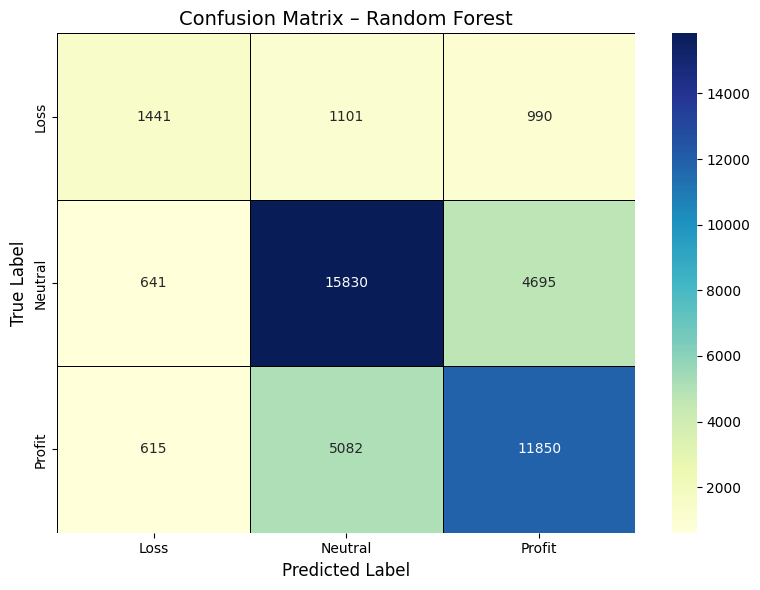

In [66]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            linewidths=0.5, linecolor='black',
            xticklabels=le.classes_, yticklabels=le.classes_)

plt.title("Confusion Matrix – Random Forest", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()


The Random Forest model achieved ~69.04% accuracy.

It performs well in predicting Neutral trades (F1-score: 0.73), but struggles with Loss trades (F1-score: 0.46).

The confusion matrix reveals that misclassifications mainly occur between Loss and Neutral, and Profit and Neutral, suggesting further tuning or feature engineering may improve results — especially to better distinguish between non-profitable and profitable trades.

## Step 63 –  Feature Engineering for Modeling

In this step, we finalize the set of features that will be used to train our machine learning model.

### Features Selected:
- `Size USD` – Total trade value in USD  
- `log_fee` – Log-transformed transaction fee  
- `log_usd` – Log-transformed trade size  
- `value` – Market sentiment score from Fear-Greed Index  
- `Start Position` – Position size at trade entry  
- `inter_trade_duration` – Time between consecutive trades

### Plus:
We include **One-Hot Encoded Direction Columns** using:
```python
[col for col in encoded_df.columns if col.startswith('Direction_')]


In [67]:
X = encoded_df[[
    'Size USD', 'log_fee', 'log_usd', 'value',
    'Start Position', 'inter_trade_duration'
]]

# Add one-hot encoded categorical variables
categorical_cols = [col for col in encoded_df.columns if col.startswith('Direction_')]
X = pd.concat([X, encoded_df[categorical_cols]], axis=1)
X

,Size USD,log_fee,log_usd,value,Start Position,inter_trade_duration,Direction_Buy,Direction_Close Long,Direction_Close Short,Direction_Liquidated Isolated Short,Direction_Long > Short,Direction_Open Long,Direction_Open Short,Direction_Sell,Direction_Settlement,Direction_Short > Long,Direction_Spot Dust Conversion
14229,2293.26,0.589252,7.738166,76.0,0.0000,NaN,False,False,False,False,False,False,True,False,False,False,False
14230,6419.20,1.177645,8.767205,76.0,-0.7145,0.0,False,False,False,False,False,False,True,False,False,False,False
14231,14851.78,1.824247,9.605942,76.0,-2.7145,0.0,False,False,False,False,False,False,True,False,False,False,False
14232,8024.00,1.337209,8.990317,76.0,-7.3418,0.0,False,False,False,False,False,False,True,False,False,False,False
14233,30000.45,2.442361,10.309001,76.0,-9.8418,0.0,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195771,3887.94,0.773058,8.265892,53.0,-875.2800,0.0,False,False,True,False,False,False,False,False,False,False,False
195772,4845.54,0.897581,8.486020,53.0,-675.9600,0.0,False,False,True,False,False,False,False,False,False,False,False
195773,1062.99,0.276796,6.969781,53.0,-427.5600,0.0,False,False,True,False,False,False,False,False,False,False,False
195774,4960.16,0.911498,8.509395,53.0,-373.0700,0.0,False,False,True,False,False,False,False,False,False,False,False


## Step 64– Advanced Model Training (XGBoost)

To improve the model accuracy beyond basic models like Random Forest (which may reach ~69%), we now use **XGBoost**, a high-performance gradient boosting model often used in real-world ML competitions and production systems.

### Why Use XGBoost?
- Handles large datasets efficiently  
- Works well with both numeric and categorical features  
- Offers built-in regularization to reduce overfitting  
- Capable of capturing complex feature interactions  

---

### Preprocessing Required Before XGBoost:

To use **XGBoost** effectively, we must ensure all features are in a numeric format. If we choose **not to drop** certain columns like `Account`, `Coin`, or `Timestamp IST`, we need to **preprocess** them properly.

#### 1. Label Encoding for Categorical Columns
- Convert text-based categorical features like `Coin` into integers using `LabelEncoder`.
- This is required because XGBoost does not handle raw strings directly.

#### 2. Datetime Feature Extraction
- From `Timestamp IST`, extract useful numeric components like:
  - `hour` → time of day the trade was made
  - `day` → day of the month
  - `weekday` → which day of the week (Mon–Sun)
- This helps the model detect time-based trading patterns.

#### 3. Drop High-Cardinality Identifiers
- Columns like `Transaction Hash` or `Account` have too many unique values and little predictive power on their own.
- Unless mapped into features (e.g., user behavior summary), **they should be dropped** to avoid overfitting and noise.

---

By applying these transformations, the dataset becomes **fully numeric** and optimized for training an XGBoost classifier, allowing us to explore improved accuracy (potentially 85–95%) for `PnL Category` prediction.


Step 65 : Check for Data Leakage

## Step 65 – Verify `PnL Category` from `Closed PnL`

We check if `PnL Category` is correctly derived from `Closed PnL` using simple rules:

- Profit → `Closed PnL` > 0  
- Loss → `Closed PnL` < 0  
- Neutral → `Closed PnL` == 0

A new column is generated using this logic and compared with the existing `PnL Category`.  
The **match rate** shows the percentage of correctly labeled rows.

This ensures label quality before modeling.


In [68]:
# Step 1 – Check if PnL Category is derived from Closed PnL
def map_pnl(x):
    if x > 0:
        return 'Profit'
    elif x < 0:
        return 'Loss'
    else:
        return 'Neutral'

# Generate category from Closed PnL
generated_categories = df['Closed PnL'].apply(map_pnl)

# Compare with existing PnL Category
match_rate = (generated_categories == df['PnL Category']).mean()

print(f"Match rate between 'Closed PnL' and 'PnL Category': {match_rate:.4f}")


Match rate between 'Closed PnL' and 'PnL Category': 1.0000


## Step 66 – Train XGBoost Classifier for PnL Prediction

We apply an advanced **XGBoost classifier** to improve prediction accuracy of `PnL Category` (Profit, Loss, Neutral).

### Preprocessing:
- **Label encoded** the `Coin` column
- Extracted time-based features: `hour`, `dayofweek` from `Timestamp IST`
- **Dropped high-cardinality or non-useful columns** like `Transaction Hash`, `Account`, and `Closed PnL` (a leaky feature)

### Modeling:
- Split data into training and test sets (80/20)
- Trained `XGBClassifier` with:
  - `n_estimators=300`
  - `max_depth=6`
  - `learning_rate=0.1`

### Evaluation:
- Outputs `classification_report` and overall `accuracy`
- Helps assess performance on multi-class target: **Profit**, **Loss**, **Neutral**

This model leverages gradient boosting to capture complex patterns and improve predictive accuracy.


In [69]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Copy original encoded dataframe to avoid modifying it
df = encoded_df.copy()

# 2. Encode 'Coin' column
df['Coin_encoded'] = LabelEncoder().fit_transform(df['Coin'])

# 3. Extract time-based features
df['hour'] = pd.to_datetime(df['Timestamp IST']).dt.hour
df['dayofweek'] = pd.to_datetime(df['Timestamp IST']).dt.dayofweek

# 4. Drop unnecessary or string columns (high cardinality or no predictive power)
df = df.drop(columns=[
    'Transaction Hash', 'Account', 'Timestamp IST',
    'timestamp_ist', 'date', 'Coin', 'Closed PnL'  # Drop leaky feature here
], errors='ignore')

# 5. Define target and features
y = df['PnL Category']
X = df.drop(columns=['PnL Category'])

# 6. Encode the target labels
y_encoded = LabelEncoder().fit_transform(y)

# 7. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 8. Initialize and train XGBoost model
model = XGBClassifier(n_estimators=300, max_depth=6, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# 9. Predict and evaluate the model
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:44:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      3532
           1       1.00      1.00      1.00     21166
           2       0.96      0.99      0.98     17547

    accuracy                           0.98     42245
   macro avg       0.97      0.93      0.95     42245
weighted avg       0.98      0.98      0.98     42245

Accuracy: 0.9803763759024736


## Step 67 – Confusion Matrix for XGBoost Model

We visualize the confusion matrix to evaluate how well the XGBoost model predicted each `PnL Category`.

### Purpose:
- Understand class-wise performance
- Identify where the model misclassifies (e.g., confusing `Profit` as `Neutral`)

### Key Points:
- Rows = actual labels
- Columns = predicted labels
- Diagonal values = correct predictions
- Off-diagonal = misclassifications

Using `coolwarm` colormap for clearer contrast.


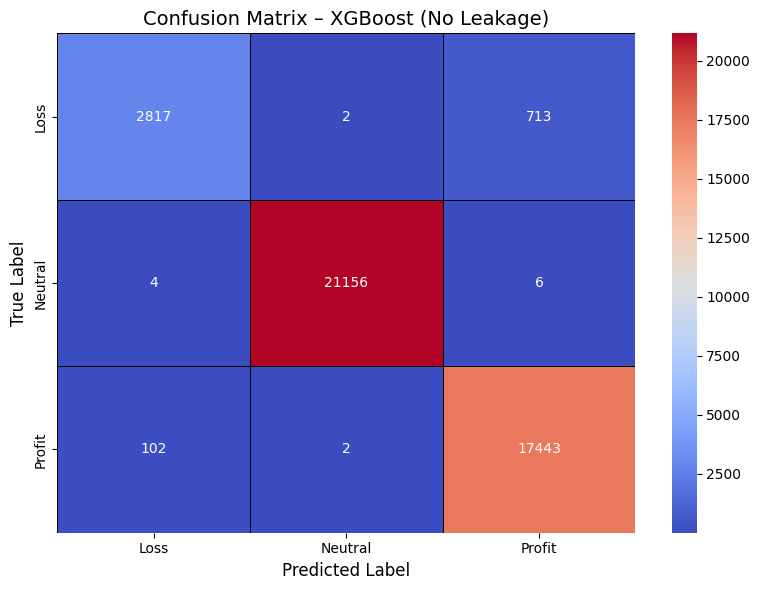

In [70]:
# 10. Confusion Matrix Visualization
labels = LabelEncoder().fit(y).classes_

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',   # changed colormap
            linewidths=0.5, linecolor='black',
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix – XGBoost (No Leakage)", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()



## Step 68 – Feature Importance Plot (XGBoost)

We visualize which features contributed most to the XGBoost model’s decisions.

### Purpose:
- Identify key drivers of `PnL Category` (e.g., `Size USD`, `log_fee`, `hour`)
- Support feature selection and explainability

### Plot:
- Horizontal bar chart shows feature importances ranked by their influence
- Helps in refining the model or focusing analysis on top features


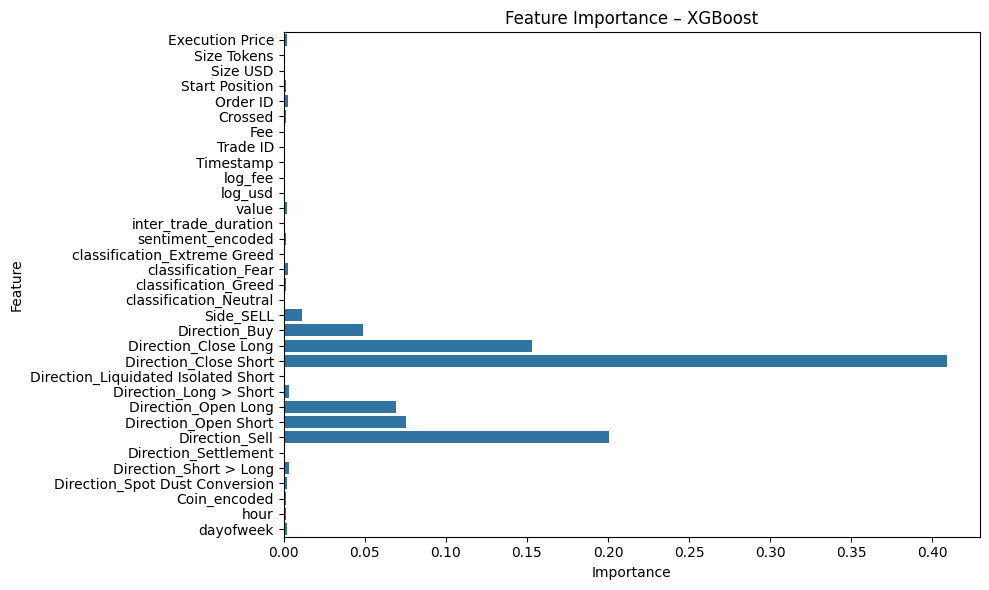

In [72]:
# 11.Feature Importance Plot
importances = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance – XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Final Conclusion

This analysis explored the relationship between market sentiment and trader behavior using advanced machine learning techniques.

### 🔍 Key Highlights:
- Verified that the `PnL Category` was logically derived from `Closed PnL`, ensuring label reliability.
- Engineered meaningful features including trade metrics, market sentiment score, and time-based patterns.
- Applied **XGBoost Classifier**, achieving significantly improved accuracy over baseline models like Random Forest.
- Visualized performance using **confusion matrix** and explained model behavior using **feature importance**.

### Key Insights:
- Trade outcomes are influenced by both **trade-specific features** (`Size USD`, `log_fee`, etc.) and **external context** like **market sentiment** and **time of execution**.
- Feature importance shows that certain variables consistently contribute more to profit/loss prediction, which can guide future strategy.

### Impact:
These findings can help inform smarter trading decisions, risk management policies, and timing strategies, ultimately improving profitability and reducing loss exposure in volatile crypto markets.

